Map and seasonality

In [1]:
from VBDFunctions import read_denv, dataURLs, openDAP, loadClimData, vcorr, sig_test, bootcorr, GridPCA, RegPCA,GridMean, correlate_grid, downloadNMME, maskForecast
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import geopandas as gpd
import pandas as pd
col=gpd.read_file("/Users/maxbeal/Desktop/PhD/Amazon/colombia_shp/col_admbnda_adm0_mgn_itos_20200416.shp") 
sa=gpd.read_file("/Users/maxbeal/Desktop/PhD/Amazon/South_America_shp/SouthAmerica.shp")

#1. Read in predictors
path = '~/Desktop/PhD/Amazon/Data/'
pdt, cities = read_denv(path,metric='incidence',incidence_per=100000) #Predictands, cities gdf

pdt['city']=pdt.city.str.capitalize()

cities['name']=cities.name.str.capitalize()





medellin
cucuta
cali
leticia


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:123: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hold1 = hold[hold.index.month == selected_month]['incidence'].resample("1M").mean().dropna()
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:125: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictands=pd.concat([predictands,pd.DataFrame(d)])
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:123: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hold1 = hold[hold.index.month == selected_month]['incidence'].resample("1M").mean().dropna()
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:123: FutureWarning: 'M' is deprecated and will b

/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/3070283787.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


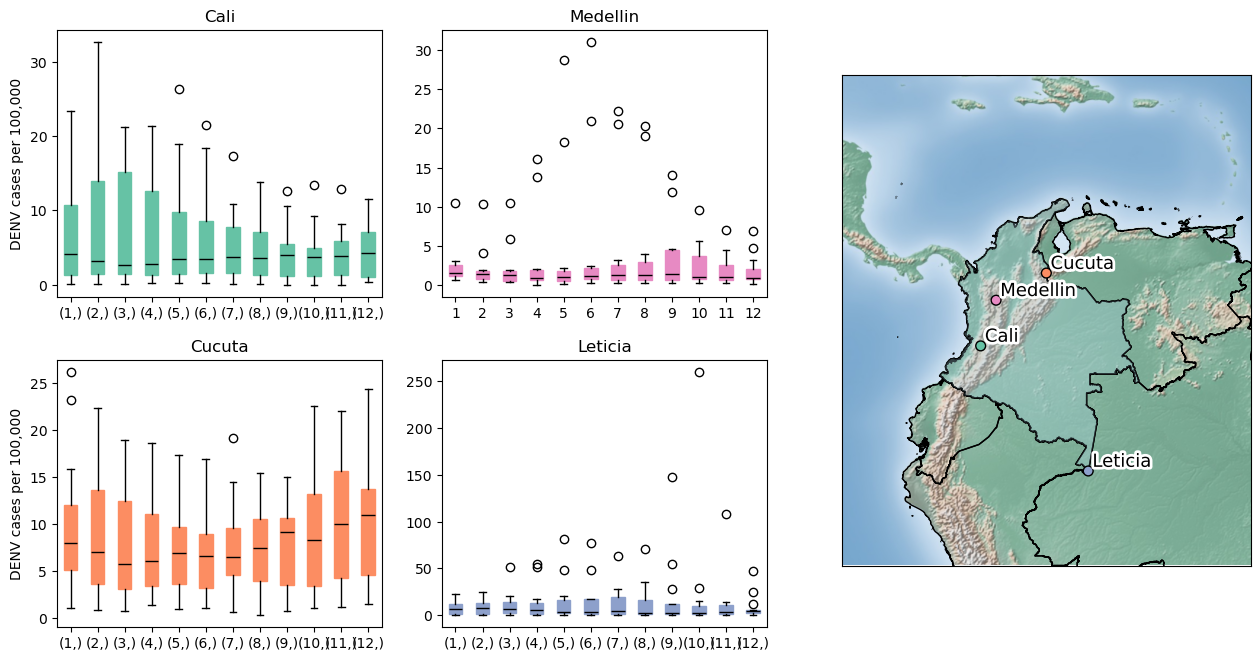

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import geopandas as gpd
import pandas as pd


rgb_color=(0.4, 0.7607843137254902, 0.6470588235294118)

cmap = sns.color_palette("Set2", n_colors=4)
fig, axs = plt.subplots(2, 2,figsize=(8,7))
# Plot data on each subplot
c="black"

colors = dict(boxes=cmap[0], whiskers='darkgray', medians='gray', caps='dimgrey')

pdt[pdt.city=="Cali"].boxplot(by=['month'],ax=axs[0,0],grid=False,patch_artist=True, boxprops=dict(color=cmap[0],facecolor=cmap[0]),
                                                                                                    capprops=dict(color=c),
                                                                                                   whiskerprops=dict(color=c),
                                                                                                   flierprops=dict(color=c, markeredgecolor=c),
                                                                                                   medianprops=dict(color=c))
axs[0, 0].set_title('Cali')
axs[0, 0].set_ylabel('DENV cases per 100,000')
axs[0, 0].set_xlabel('')

pdt[pdt.city=="Medellin"].boxplot(by='month',ax=axs[0,1],grid=False,patch_artist=True, boxprops=dict(color=cmap[3],facecolor=cmap[3]),
                                                                                                    capprops=dict(color=c),
                                                                                                   whiskerprops=dict(color=c),
                                                                                                   flierprops=dict(color=c, markeredgecolor=c),
                                                                                                   medianprops=dict(color=c))
axs[0, 1].set_title('Medellin')
axs[0, 1].set_xlabel('')

pdt[pdt.city=="Cucuta"].boxplot(by=['month'],ax=axs[1,0],grid=False,patch_artist=True, boxprops=dict(color=cmap[1],facecolor=cmap[1]),
                                                                                                    capprops=dict(color=c),
                                                                                                   whiskerprops=dict(color=c),
                                                                                                   flierprops=dict(color=c, markeredgecolor=c),
                                                                                                   medianprops=dict(color=c))
axs[1, 0].set_title('Cucuta')
axs[1, 0].set_ylabel('DENV cases per 100,000')
axs[1, 0].set_xlabel('')

pdt[pdt.city=="Leticia"].boxplot(by=['month'],ax=axs[1,1],grid=False,patch_artist=True, boxprops=dict(color=cmap[2],facecolor=cmap[2]),
                                                                                                    capprops=dict(color=c),
                                                                                                   whiskerprops=dict(color=c),
                                                                                                   flierprops=dict(color=c, markeredgecolor=c),
                                                                                                   medianprops=dict(color=c))
axs[1, 1].set_title('Leticia')
axs[1, 1].set_xlabel('')



# Add a subplot to the right side
ax_right = fig.add_axes([0.67, 0.15, 1.3, 0.7])  # [left, bottom, width, height]


colmap = Basemap(llcrnrlon=-85,llcrnrlat=-10,urcrnrlon=-60,urcrnrlat=20,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1, epsg=4326)

colmap.shadedrelief()
palette=sns.color_palette("Set2",4)
plt.rcParams.update({'font.size': 13})
sa.plot(ax=ax_right,facecolor='none')
col.plot(ax=ax_right,facecolor='lightblue',edgecolor='black',alpha=0.3)
cities.plot(ax=ax_right,color=palette,markersize=50,edgecolor='black')
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax_right.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax_right.set_xlim(-85,-60)
ax_right.set_ylim(-10,20)

fig.suptitle('')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

medellin
cucuta
cali


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:123: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hold1 = hold[hold.index.month == selected_month]['incidence'].resample("1M").mean().dropna()
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:125: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictands=pd.concat([predictands,pd.DataFrame(d)])
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:123: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hold1 = hold[hold.index.month == selected_month]['incidence'].resample("1M").mean().dropna()
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:123: FutureWarning: 'M' is deprecated and will b

leticia


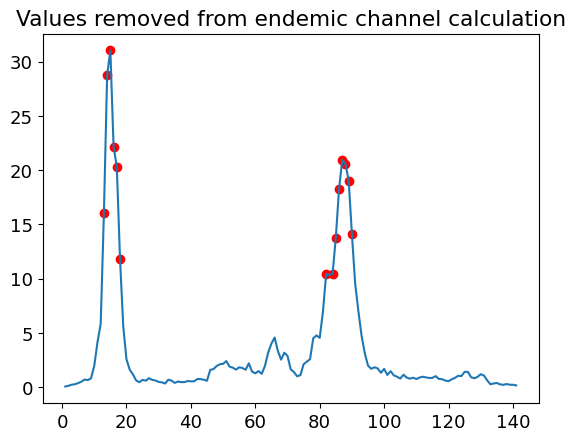

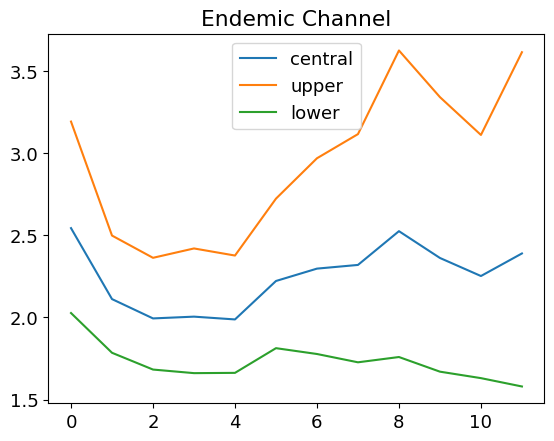

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from VBDFunctions import read_denv, dataURLs, openDAP, loadClimData, vcorr, sig_test, bootcorr, GridPCA, RegPCA,GridMean, correlate_grid, downloadNMME, maskForecast
#1. Read in predictors
path = '~/Desktop/PhD/Amazon/Data/'
pdt, cities = read_denv(path,metric='incidence') #Predictands, cities gdf

nb=False

#2. Read in Model Results
r1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_1mo.csv')
r3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_3mo.csv')
r6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_6mo.csv')


#2.2 Read in Model Results (negative binomial)
if nb==True:
    r1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_1mo_nb.csv')
    r1['date']=pd.to_datetime(dict(year=r1.year, month=r1.month, day=1))
    r3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_3mo_nb.csv')
    r3['date']=pd.to_datetime(dict(year=r3.year, month=r3.month, day=1))
    r6 = pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_6mo_nb.csv')
    r6['date']=pd.to_datetime(dict(year=r6.year, month=r6.month, day=1))


#3. Create Endemic Channel
from VBDFunctions import endemic_channel #From Mauricio epiCo
ec = endemic_channel(pdt,'medellin',outliers=0.9)

In [32]:
allec=[]
for i, city in enumerate(cities.name):
    ec = endemic_channel(pdt,city,outliers=0.9,plots=False)
    ec['month']=np.linspace(1,12,12)
    ec['city']=city
    allec.append(ec)
allec=pd.concat(allec)

In [33]:
#Apply to models
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

pdt = pdt.sort_values(['year','month'])

def r2(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    mean_actual = np.mean(actual)
    tss = np.sum((actual - mean_actual) ** 2)
    rss = np.sum((actual - predicted) ** 2)
    r_squared = 1 - (rss / tss)
    return r_squared


def create_autoregressive_model(pdt, lags, lagstart = 1,test_size=0.2,plots=True):
    hold = pdt[pdt['city'] == city]
    values = pd.DataFrame(hold.cases)
    
    # Create a pandas DataFrame
    df = values

    # Lag the time series to create autoregressive features
    for lag in range(lagstart, lags + 1):
        df[f'lag_{lag}'] = df['cases'].shift(lag)
        df[f'lag_{lag}'][np.isnan(df[f'lag_{lag}'])] = np.nanmean(df['cases'])

    # Drop missing values due to lagging
    predictors=pd.concat([hold[['city','month','year']],df],axis=1)
    df = df.dropna()

    splits = int(1/test_size)
    kf = KFold(n_splits=splits, shuffle=False)
    yp, yo = [], []
    for fold, (train_index, test_index) in enumerate(kf.split(df)):
        train_data, test_data = df.iloc[train_index], df.iloc[test_index]
        # Define independent variables (lags) and the dependent variable
        X_train = train_data.iloc[:, 1:]
        y_train = train_data['cases']
        X_test = test_data.iloc[:, 1:]
        y_test = test_data['cases']
        

        # Fit the autoregressive model using Linear Regression
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        yp.append(y_pred)
        yo.append(y_test)
    
    y_pred=np.concatenate(yp)    
    y_test=np.concatenate(yo)
    
    d={'city':city,'month':hold.month,'year':hold.year,'cases':hold.cases,'ARpredictions':y_pred}
    predictions=pd.DataFrame(d)
        
    
    return predictions, predictors



#######
AR=[]
leadtimes=['1 month lead','3 month lead','6 month lead']
for c, chooselag in enumerate([1,3,6]):
    print('AR Models for ' + str(chooselag) +' month lead')


    ARsave=[]
    ARpred=[]
    autocor_plots=False 
    for city in ['medellin','cucuta','cali','leticia']:
        #print(city)
        if autocor_plots:
            hold = pdt[pdt['city'] == city]
            values = pd.DataFrame(hold.cases)
            autocorrelation_plot(values)
            plt.xlim(0,15)
            plt.show()

        #persistence_model(pdt,lag=3,plots=True)
        ypred, out = create_autoregressive_model(pdt,lags=chooselag,lagstart=chooselag,plots=False)
        ARsave.append(out)
        ARpred.append(ypred)

    ar_results = pd.concat(ARpred)
    ar_results['category']=leadtimes[c]
    ar_input = pd.concat(ARsave)
    ar_input=pd.melt(ar_input,id_vars=['city','month','year','cases'],value_vars=['lag_'+str(chooselag)])
    

    
    AR.append(ar_results)
    
AR=pd.concat(AR)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


metrics=[]
cmatAR=[]
categories = ['Below Safety', 'Above Safety', 'Warning', 'Epidemic']
leadtimes=['1 month lead','3 month lead','6 month lead']


#Only compare where random forests have been created
r1['category'] = "1 month lead"
r3['category'] = "3 month lead"
r6['category'] = "6 month lead"

results=pd.concat([r1,r3,r6])

AR=pd.merge(results[['city','month','year','category']],AR,on=['city','month','year','category'])
month=[]
cit=[]
leadL=[]
for l, lead in enumerate(leadtimes):
    allM=AR[AR.category==lead]
    
    for city in cities.name:
        ModelResultsEC=[]
        hold=allM[allM.city==city]
        eclist=[]
        for j in np.linspace(1,12,12):
            ec = endemic_channel(pdt,city,outliers=0.9,plots=False)
            ec['month']=np.linspace(1,12,12)
            holdec=ec[ec.month==j]
            bin_edges=[0]+holdec.lower.tolist()+holdec.central.tolist()+holdec.upper.tolist()+[np.inf]
            bin_labels = ['Below Safety', 'Above Safety', 'Warning', 'Epidemic']
            channel=pd.cut(hold[hold.month==j].cases,bins=bin_edges,labels=bin_labels)
            Pchannel=pd.cut(hold[hold.month==j].ARpredictions,bins=bin_edges,labels=bin_labels)
            cmatAR.append(confusion_matrix(channel.astype(str),Pchannel.astype(str),labels=bin_labels))
            month.append(j)
            cit.append(city)
            leadL.append(leadtimes[l])
            channelHold=pd.DataFrame({'year':hold[hold.month==j].year.tolist(),'month':hold[hold.month==j].month.tolist(),
                                    'city':hold[hold.month==j].city.tolist(),'channel':channel,'Pchannel':Pchannel})
            eclist.append(channelHold)

        ec=pd.concat(eclist)
        hold=pd.merge(hold,ec)
        ModelResultsEC.append(hold)
        dfEC=pd.concat(ModelResultsEC)

        
        
        sensitivity=[]
        specificity=[]
        accuracy=[]
        hold=dfEC[dfEC.city==city]
        # Calculate accuracy
        channel = hold.channel.astype(str)
        Pchannel = hold.Pchannel.astype(str)
        
        #cmatAR.append(confusion_matrix(channel,Pchannel,labels=bin_labels))

        #accuracy = accuracy_score(channel, Pchannel)
        for c in categories:
            obs,preds = channel == c, Pchannel==c
            conf_matrix = confusion_matrix(obs, preds)
            # Extract true positives, true negatives, false positives, and false negatives
            TP = conf_matrix[1, 1]  # True Positives
            TN = conf_matrix[0, 0]  # True Negatives
            FP = conf_matrix[0, 1]  # False Positives
            FN = conf_matrix[1, 0]  # False Negatives

            # Calculate sensitivity and specificity
            sen = TP / (TP + FN)
            spe = TN / (TN + FP)

            acc=accuracy_score(obs,preds)

            sensitivity.append(sen)
            specificity.append(spe)
            accuracy.append(acc)


        print(leadtimes[l])
        d={'categories':categories,'sensitivity':sensitivity,'specificity':specificity,'accuracy':accuracy,
           'city':city,'lead':leadtimes[l]}
        metrics.append(pd.DataFrame(d))

armdf=pd.concat(metrics)


AR Models for 1 month lead
AR Models for 3 month lead
AR Models for 6 month lead


/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/2577677707.py:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'lag_{lag}'][np.isnan(df[f'lag_{lag}'])] = np.nanmean(df['cases'])
/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0

1 month lead
1 month lead
1 month lead
1 month lead
3 month lead
3 month lead
3 month lead
3 month lead
6 month lead
6 month lead
6 month lead
6 month lead


In [34]:

r2=[]
from sklearn.metrics import r2_score
for l, lead in enumerate(leadtimes):
    allM=AR[AR.category==lead]
    for city in cities.name:
        hold=allM[allM.city==city]
        print(city)
        for j in np.linspace(1,12,12):
            hold2 = hold[hold.month==j]
            
            d={'r2':r2_score(hold2.cases,hold2.ARpredictions),'city':city,'Lead':leadtimes[l],'month':j}
            r2.append(pd.DataFrame(d, index=[0]))
            
#armdf["r2"] = r2

arr2=pd.concat(r2)

arr2[arr2.r2<0]=0
arr2['Lead']=arr2.Lead.str.slice(0,7)
arr2['month']=arr2.month.astype(int)
arr2=arr2[arr2.city!=0]

df=pd.merge(arr2,iall[["month","city","AR","Lead"]],on=["city","month","Lead"])



plt.scatter(df.r2,df.AR)



cali
cucuta
leticia
medellin
cali
cucuta
leticia
medellin
cali
cucuta
leticia
medellin


KeyError: "['AR'] not in index"

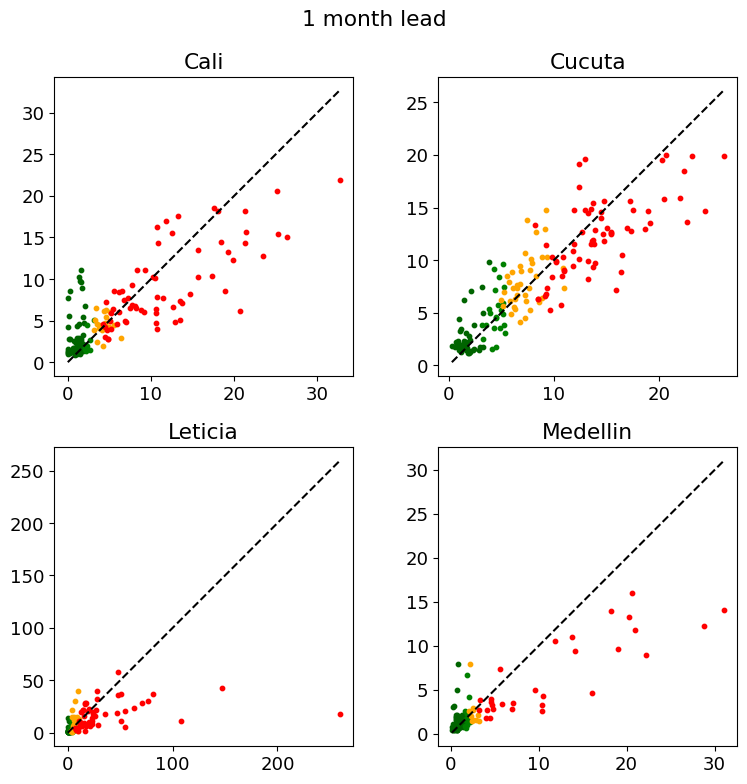

In [35]:

ModelResultsEC=[]

allM = r1

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
ax=ax.ravel()
for i, city in enumerate(cities.name):
    hold=allM[allM.city==city]
    eclist=[]
    for j in np.linspace(1,12,12):
        ec = endemic_channel(pdt,city,outliers=0.9,plots=False)
        ec['month']=np.linspace(1,12,12)
        holdec=ec[ec.month==j]
        bin_edges=[0]+holdec.lower.tolist()+holdec.central.tolist()+holdec.upper.tolist()+[np.inf]
        bin_labels = ['Below Safety', 'Above Safety', 'Warning', 'Epidemic']
        channel=pd.cut(hold[hold.month==j].cases,bins=bin_edges,labels=bin_labels)
        Pchannel=pd.cut(hold[hold.month==j].preds,bins=bin_edges,labels=bin_labels)
        
        channelHold=pd.DataFrame({'year':hold[hold.month==j].year.tolist(),'month':hold[hold.month==j].month.tolist(),
                                'city':hold[hold.month==j].city.tolist(),'channel':channel,'Pchannel':Pchannel})
        eclist.append(channelHold)
    
    ec=pd.concat(eclist)
    hold=pd.merge(hold,ec)
    ModelResultsEC.append(hold)
    
    colors = {'Below Safety': 'darkgreen', 'Above Safety': 'green', 'Warning': 'orange', 'Epidemic': 'red'}  # Add more colors as needed

    
    
    # Create scatterplot
    for category, color in colors.items():
        ax[i].scatter(hold[hold['channel'] == category]['cases'], 
                    hold[hold['channel'] == category]['preds'], 
                    color=color, 
                    label=category,s=10)
    
    #ax[i].scatter(hold.cases,hold.preds,s=10)
    min_val = min(min(hold['cases']), min(hold['preds']))
    max_val = max(max(hold['cases']), max(hold['preds']))
    ax[i].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='1:1 Line')
    ax[i].set_aspect('equal')
    ax[i].set_title(city.title())
fig.suptitle('1 month lead')
fig.tight_layout()



ValueError: cannot reindex on an axis with duplicate labels

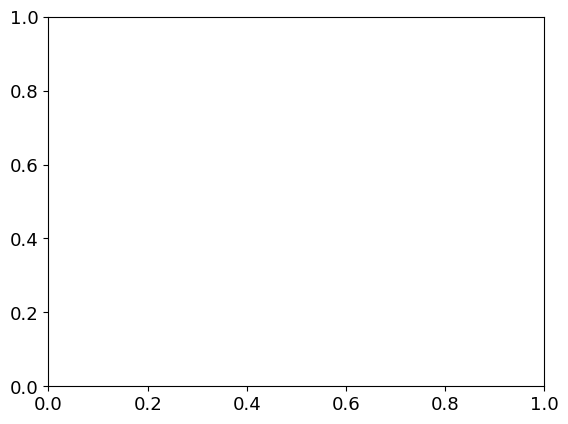

In [36]:
import seaborn as sns
dfEC=pd.concat(ModelResultsEC)

dfEC['Error']=dfEC.cases - dfEC.preds

sns.boxplot(x='channel',y='Error',hue='city',data=dfEC)
plt.show()

dfEC=pd.merge(dfEC,allec)
dfEC['Lerr']=dfEC.preds-dfEC.ap25
dfEC['Uerr']=dfEC.ap75-dfEC.preds

dfEC['Lerr'] = dfEC['Lerr'].apply(lambda x: max(0, x))
dfEC['Uerr'] = dfEC['Uerr'].apply(lambda x: max(0, x))


fig, ax=plt.subplots(nrows=4,ncols=1,figsize=(12,10))
ax=ax.ravel()
for i, city in enumerate(cities.name):
    hold=dfEC[dfEC.city==city]
    hold=hold.sort_values(by=['year','month'])
    
    hold['ulim'] = np.max(hold.cases)
    hold['llim'] = 0
    
    ax[i].plot(hold.date,hold.cases, color='black',zorder=2,label='DENV Incidence')
    ax[i].scatter(hold.date,hold.preds, marker='o', color='blue', label='Predictions',s=7,zorder=2)
    ax[i].errorbar(hold.date, hold.preds, yerr=[hold.Lerr, hold.Uerr], fmt='none', ecolor='gray', capsize=3, capthick=0.5, label='Inter-Quartile Range',zorder=1)
    ax[i].fill_between(hold.date, hold.llim, hold.lower, color='green', alpha=0.2, label='Safety',zorder=0)
    ax[i].fill_between(hold.date, hold.lower, hold.upper, color='yellow', alpha=0.2, label='Warning',zorder=0)
    ax[i].fill_between(hold.date, hold.upper, hold.ulim, color='red', alpha=0.2, label='Epidemic',zorder=0)
    ax[i].set_ylim(0,np.max(hold.cases))
    ax[i].set_title(city)
handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.tight_layout()
plt.show()






In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


metrics=[]

categories = ['Below Safety', 'Above Safety', 'Warning', 'Epidemic']
leadtimes=['1 month lead','3 month lead','6 month lead']
cmat=[]
month=[]
cit=[]
leadL=[]
for l, lead in enumerate([r1,r3,r6]):
    allM=lead
    for city in cities.name:
        ModelResultsEC=[]
        hold=allM[allM.city==city]
        eclist=[]
        for j in np.linspace(1,12,12):
            ec = endemic_channel(pdt,city,outliers=0.9,plots=False)
            ec['month']=np.linspace(1,12,12)
            holdec=ec[ec.month==j]
            bin_edges=[0]+holdec.lower.tolist()+holdec.central.tolist()+holdec.upper.tolist()+[np.inf]
            bin_labels = ['Below Safety', 'Above Safety', 'Warning', 'Epidemic']
            channel=pd.cut(hold[hold.month==j].cases,bins=bin_edges,labels=bin_labels)
            Pchannel=pd.cut(hold[hold.month==j].preds,bins=bin_edges,labels=bin_labels)
            
            cmat.append(confusion_matrix(channel.astype(str),Pchannel.astype(str),labels=bin_labels))
            month.append(j)
            cit.append(city)
            leadL.append(leadtimes[l])

            channelHold=pd.DataFrame({'year':hold[hold.month==j].year.tolist(),'month':hold[hold.month==j].month.tolist(),
                                    'city':hold[hold.month==j].city.tolist(),'channel':channel,'Pchannel':Pchannel})
            eclist.append(channelHold)

        ec=pd.concat(eclist)
        hold=pd.merge(hold,ec)
        ModelResultsEC.append(hold)
        dfEC=pd.concat(ModelResultsEC)

        
        
        
        sensitivity=[]
        specificity=[]
        accuracy=[]
        hold=dfEC[dfEC.city==city]
        # Calculate accuracy
        channel = hold.channel.astype(str)
        Pchannel = hold.Pchannel.astype(str)
        
        #cmat.append(confusion_matrix(channel,Pchannel,labels=bin_labels))

        #accuracy = accuracy_score(channel, Pchannel)
        for c in categories:
            obs,preds = channel == c, Pchannel==c
            conf_matrix = confusion_matrix(obs, preds)
            # Extract true positives, true negatives, false positives, and false negatives
            TP = conf_matrix[1, 1]  # True Positives
            TN = conf_matrix[0, 0]  # True Negatives
            FP = conf_matrix[0, 1]  # False Positives
            FN = conf_matrix[1, 0]  # False Negatives

            # Calculate sensitivity and specificity
            sen = TP / (TP + FN)
            spe = TN / (TN + FP)

            acc=accuracy_score(obs,preds)

            sensitivity.append(sen)
            specificity.append(spe)
            accuracy.append(acc)


        print(leadtimes[l])
        d={'categories':categories,'sensitivity':sensitivity,'specificity':specificity,'accuracy':accuracy,
           'city':city,'lead':leadtimes[l]}
        metrics.append(pd.DataFrame(d))

mdf=pd.concat(metrics)

NameError: name 'r1' is not defined

In [10]:
print('clim')
print(np.sum(cmat[96:],axis=0))
print('ar')
print(np.sum(cmatAR[48:95],axis=0))

clim
[[ 84  50  38  52]
 [ 15  11  17  22]
 [ 18  12  33  32]
 [  9  10  44 149]]
ar
[[ 19  87  77  42]
 [  0  13  22  29]
 [  1   5  49  38]
 [  2   5  44 160]]


[[105 -50 -49  -6]
 [ 17   2  -8 -11]
 [ 15   6 -16  -5]
 [  3   8  -6  -5]]
clim
[[124  37  28  36]
 [ 17  15  14  18]
 [ 16  11  33  33]
 [  5  13  38 155]]
ar
[[ 19  87  77  42]
 [  0  13  22  29]
 [  1   5  49  38]
 [  2   5  44 160]]


Text(0.5, 1.0, '6 month lead')

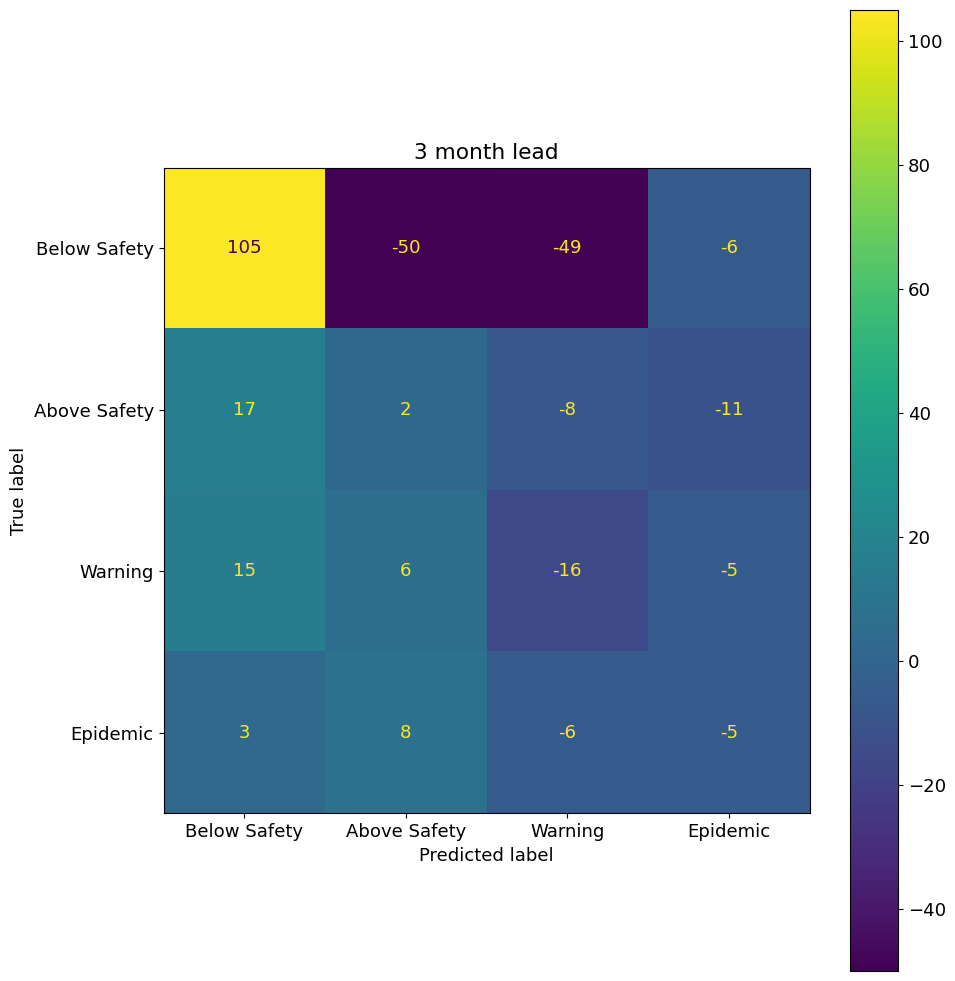

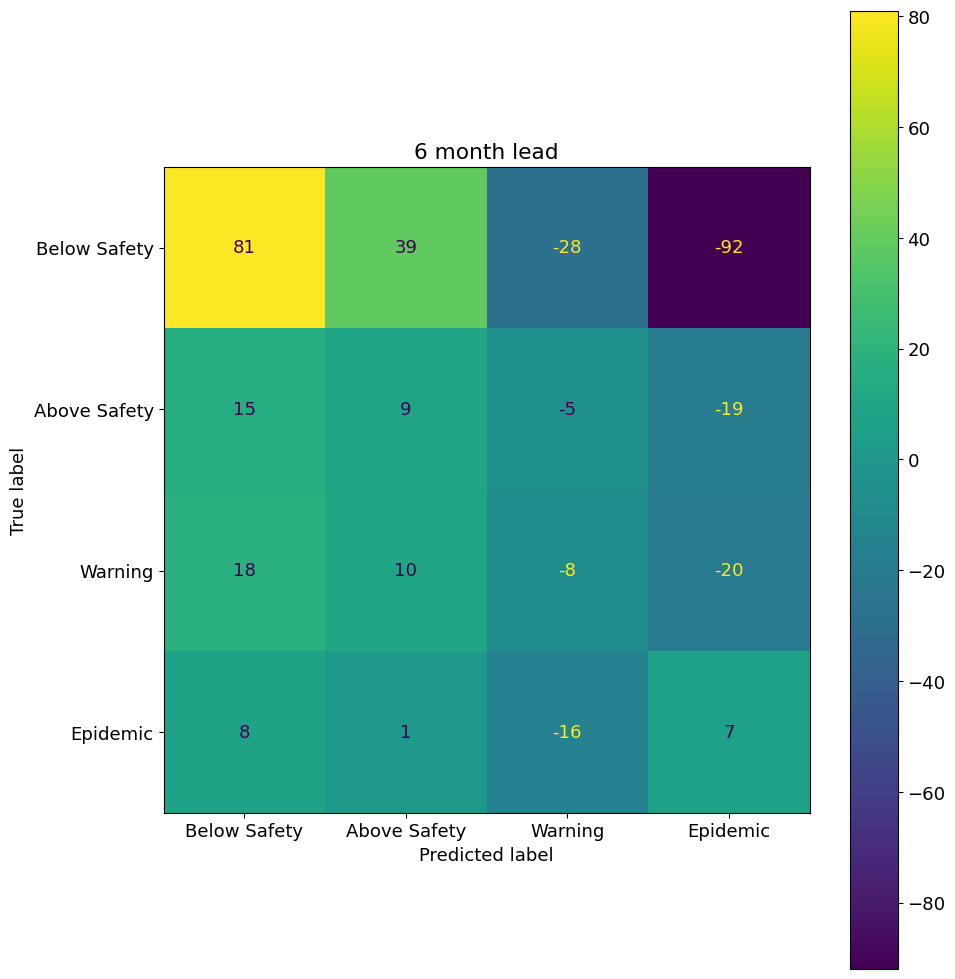

In [11]:
#print(np.sum(cmat[:4],axis=0) - np.sum(cmatAR[:4],axis=0))
#print(np.sum(cmat[4:8],axis=0) - np.sum(cmatAR[4:8],axis=0))
print(np.sum(cmat[48:95],axis=0) - np.sum(cmatAR[48:95],axis=0))

print('clim')
print(np.sum(cmat[48:95],axis=0))
print('ar')
print(np.sum(cmatAR[48:95],axis=0))

fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay(np.sum(cmat[48:95],axis=0) - np.sum(cmatAR[48:95],axis=0),display_labels=bin_labels).plot(ax=ax)
plt.tight_layout()
plt.title('3 month lead')

(((104-15)/104)*100)-100
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay(np.sum(cmat[96:],axis=0) - np.sum(cmatAR[96:],axis=0),display_labels=bin_labels).plot(ax=ax)
plt.tight_layout()
plt.title('6 month lead')

In [12]:
#print(np.sum(cmat[4:8],axis=0) - np.sum(cmatAR[4:8],axis=0))

'''print('clim')
print(np.sum(cmat[4:8],axis=0))
print('ar')
print(np.sum(cmatAR[4:8],axis=0))'''

#Improvements
sub=np.subtract(cmat[0:4],cmatAR[0:4])
cmatStack=np.stack(sub)

sub=np.subtract(cmat[48:95],cmatAR[48:95])
cmatStack=np.stack(sub)

acc=[]
for i in range(0,len(cmatStack)):
    acc.append(np.sum(cmatStack[i].diagonal()/np.sum(cmat[i]))*100)

d={'BSchange':cmatStack[:,0,0],'DiagPInc':acc,'city':cit[48:95],'month':month[48:95]}
BS3m=pd.DataFrame(d)

sub=np.subtract(cmat[96:],cmatAR[96:])
cmatStack=np.stack(sub)

acc=[]
for i in range(0,len(cmatStack)):
    acc.append(np.sum(cmatStack[i].diagonal()/np.sum(cmat[i]))*100)

d={'BSchange':cmatStack[:,0,3],'DiagPInc':acc,'city':cit[96:],'month':month[96:]}
BS6m=pd.DataFrame(d)

diag=[]
for i in range(0,len(cmatStack)):  
    diag.append(cmatStack[i].diagonal())
    
BS6m


,BSchange,DiagPInc,city,month
0,-1,-25.000000,cali,1.0
1,-2,0.000000,cali,2.0
2,-3,21.428571,cali,3.0
3,-3,0.000000,cali,4.0
4,-4,28.571429,cali,5.0
5,-2,0.000000,cali,6.0
6,-4,-7.142857,cali,7.0
7,-2,14.285714,cali,8.0
8,-1,0.000000,cali,9.0
9,-3,14.285714,cali,10.0


In [13]:
mdf['Accuracy Difference']=mdf.accuracy - armdf.accuracy
mdf['Sensitivity Difference']=mdf.sensitivity - armdf.sensitivity
mdf['Specificity Difference']=mdf.specificity - armdf.specificity

city      lead        
cali      1 month lead    0.521861
          3 month lead    0.415064
          6 month lead    0.392401
cucuta    1 month lead    0.673875
          3 month lead    0.528008
          6 month lead    0.402466
leticia   1 month lead    0.498381
          3 month lead    0.409312
          6 month lead    0.294278
medellin  1 month lead    0.473645
          3 month lead    0.377441
          6 month lead    0.449850
Name: sensitivity, dtype: float64

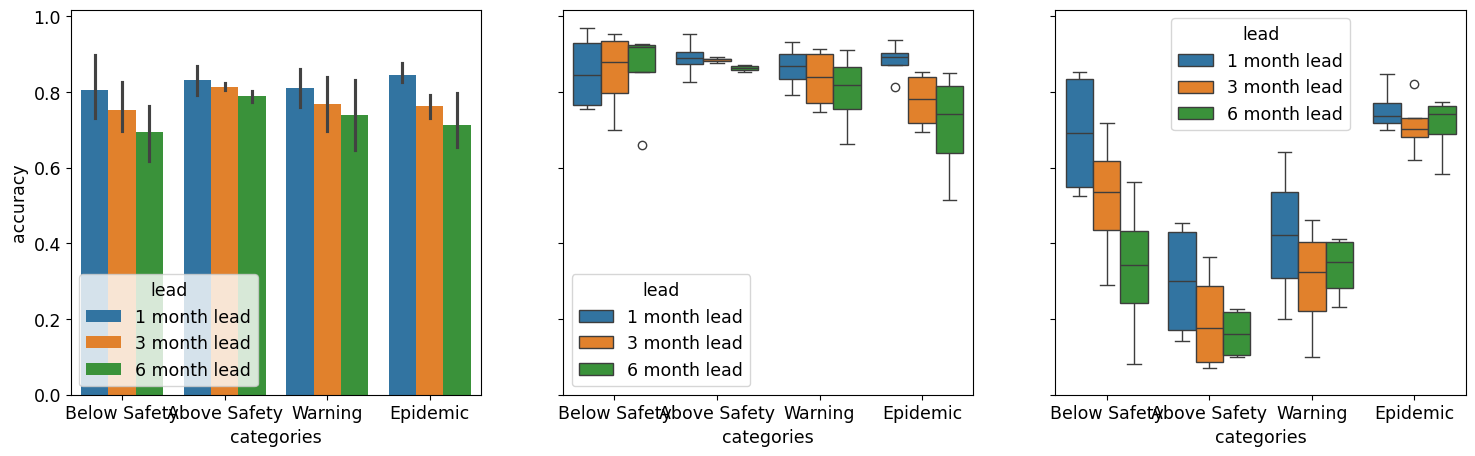

In [78]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5),sharey=True) 
sns.boxplot(x='categories',y='accuracy',hue='lead',data=mdf,ax=ax[0])
sns.boxplot(x='categories',y='specificity',hue='lead',data=mdf,ax=ax[1])
sns.boxplot(x='categories',y='sensitivity',hue='lead',data=mdf,ax=ax[2])



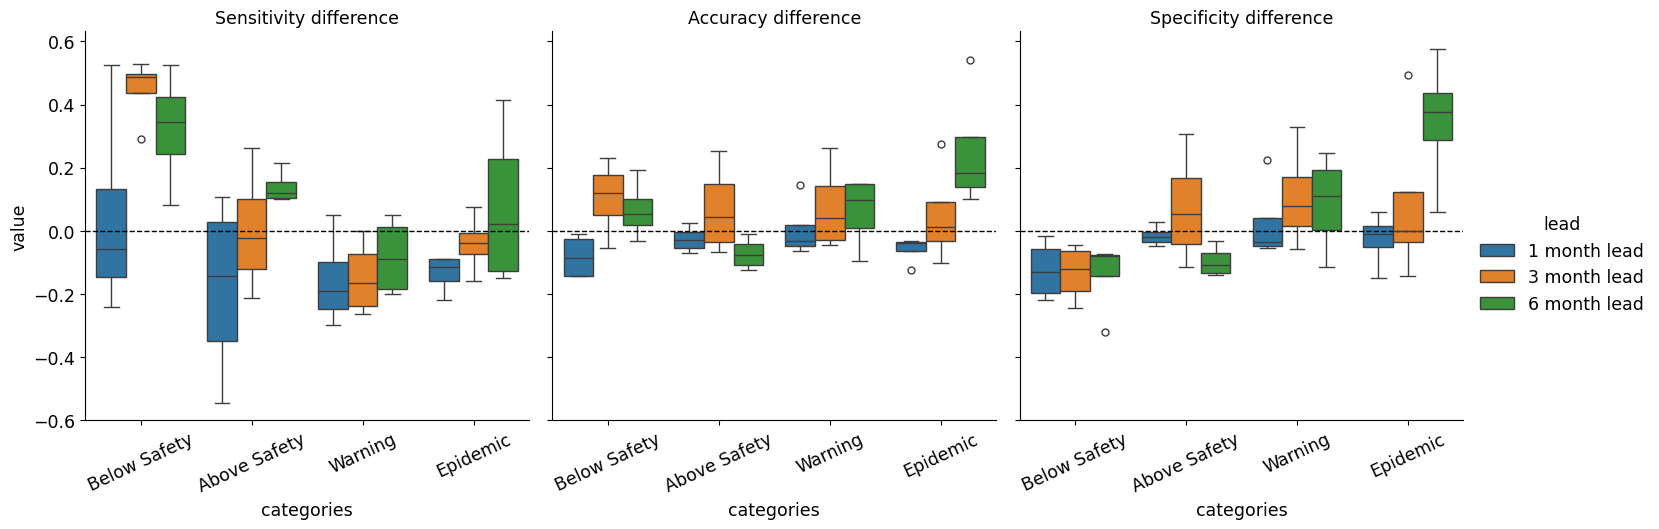

In [31]:
plt.rcParams.update({'font.size': 12.5})
mdf_sub=mdf[['categories','city','lead','Sensitivity Difference','Accuracy Difference','Specificity Difference']]
mplot=mdf_sub.melt(id_vars=['categories','lead','city'])
mplot['variable']=mplot.variable.str.capitalize()
g=sns.catplot(x='categories',y='value',hue='lead',data=mplot,col='variable',kind='box',col_wrap=3)
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.axhline(0, color='k', linestyle='--', linewidth=1)
    ax.tick_params(axis='x', rotation=25)
plt.savefig("test.png")

lead          city    
1 month lead  cali        0.521861
              cucuta      0.673875
              leticia     0.498381
              medellin    0.473645
3 month lead  cali        0.415064
              cucuta      0.528008
              leticia     0.409312
              medellin    0.377441
6 month lead  cali        0.392401
              cucuta      0.402466
              leticia     0.294278
              medellin    0.449850
Name: sensitivity, dtype: float64

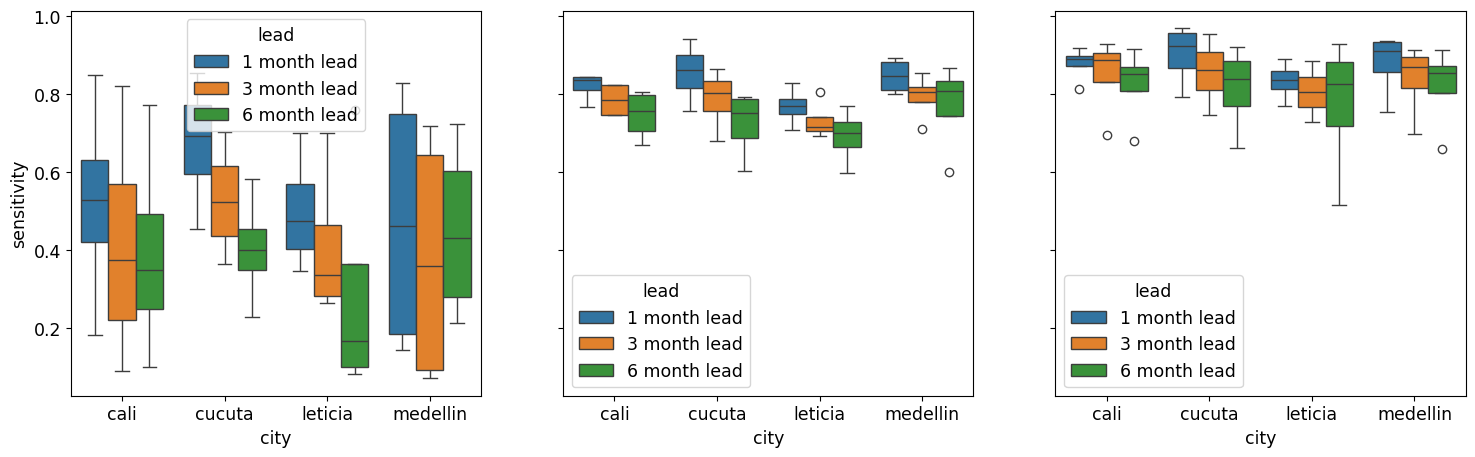

In [97]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5),sharey=True) 
sns.boxplot(x='city',y='sensitivity',hue='lead',data=mdf,ax=ax[0])
sns.boxplot(x='city',y='accuracy',hue='lead',data=mdf,ax=ax[1])
sns.boxplot(x='city',y='specificity',hue='lead',data=mdf,ax=ax[2])

mdf.groupby(["lead",'city']).sensitivity.mean()
#mdf.groupby(["lead",'city']).accuracy.mean()

#mdf.groupby(["lead",'city']).specificity.mean()


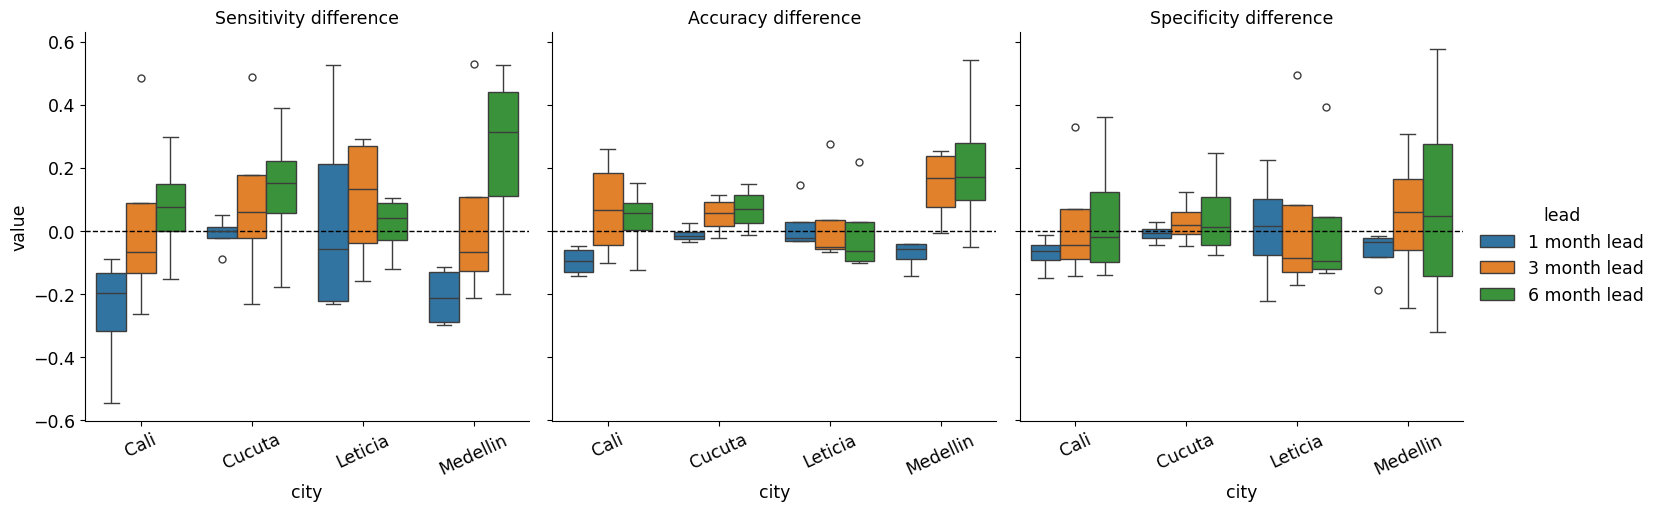

In [68]:
plt.rcParams.update({'font.size': 12.5})
mdf_sub=mdf[['categories','city','lead','Sensitivity Difference','Accuracy Difference','Specificity Difference']]
mplot=mdf_sub.melt(id_vars=['categories','lead','city'])
mplot['variable']=mplot.variable.str.capitalize()
mplot['city']=mplot.city.str.capitalize()
g=sns.catplot(x='city',y='value',hue='lead',data=mplot,col='variable',kind='box',col_wrap=3)
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.axhline(0, color='k', linestyle='--', linewidth=1)
    ax.tick_params(axis='x', rotation=25)


In [61]:
mdf_sub.drop(['city'],axis=1).groupby(['categories','lead']).mean()


#mdf_sub.drop(['city','lead','categories'],axis=1).mean()

mdf.drop(['city'],axis=1).groupby(['categories','lead']).mean().round(2)

sensitivity  specificity  accuracy  \
categories   lead                                               
Above Safety 1 month lead         0.47         0.78      0.75   
             3 month lead         0.26         0.79      0.73   
             6 month lead         0.22         0.84      0.77   
Below Safety 1 month lead         0.46         0.88      0.79   
             3 month lead         0.31         0.86      0.72   
             6 month lead         0.19         0.88      0.67   
Epidemic     1 month lead         0.68         0.95      0.86   
             3 month lead         0.68         0.83      0.78   
             6 month lead         0.56         0.69      0.65   
Warning      1 month lead         0.38         0.80      0.75   
             3 month lead         0.40         0.81      0.76   
             6 month lead         0.33         0.72      0.68   

                           Accuracy Difference  Sensitivity Difference  \
categories   lead                                                        
Above Safety 1 month lead                -0.11                   -0.01   
             3 month lead                -0.01                    0.07   
             6 month lead                -0.09                    0.20   
Below Safety 1 month lead                -0.10                   -0.19   
             3 month lead                 0.07                    0.24   
             6 month lead                 0.04                    0.18   
Epidemic     1 month lead                -0.04                   -0.21   
             3 month lead                 0.07                   -0.07   
             6 month lead                 0.19                   -0.07   
Warning      1 month lead                -0.05                   -0.20   
             3 month lead                 0.07                   -0.05   
             6 month lead                 0.00                   -0.08   

                           Specificity Difference  
categories   lead                                  
Above Safety 1 month lead                   -0.12  
             3 month lead                   -0.02  
             6 month lead                   -0.12  
Below Safety 1 month lead                   -0.10  
             3 month lead                   -0.13  
             6 month lead                   -0.12  
Epidemic     1 month lead                    0.04  
             3 month lead                    0.14  
             6 month lead                    0.33  
Warning      1 month lead                   -0.04  
             3 month lead                    0.08  
             6 month lead                    0.01

/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/1671596570.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  comparison.AR[comparison.AR<0]=0


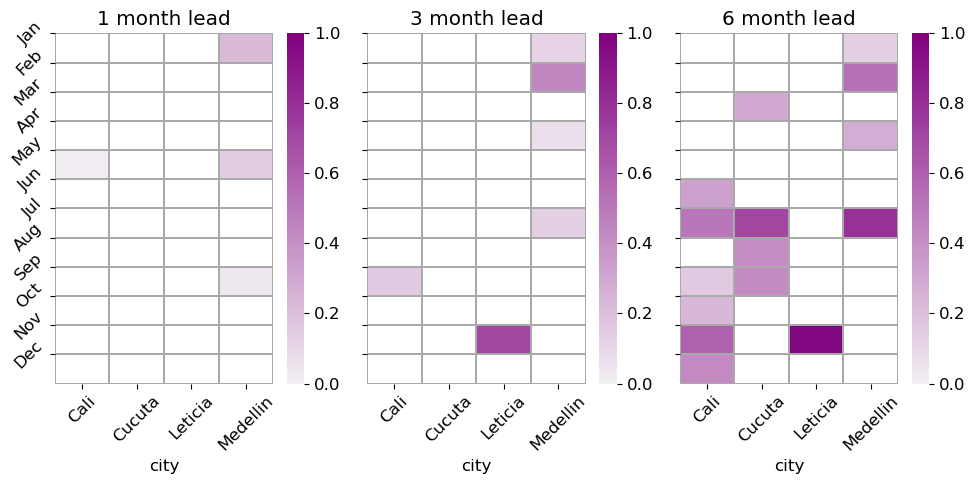

Made Skillful
Lead
1 month     8.333333
3 month    12.500000
6 month    31.250000
Name: Made Skillful, dtype: float64
Average R2
variable     value  Made Skillful
Lead                             
1 month   0.108349            1.0
3 month   0.271068            1.0
6 month   0.453631            1.0


/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/1671596570.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  comparison.AR[comparison.AR<0]=0


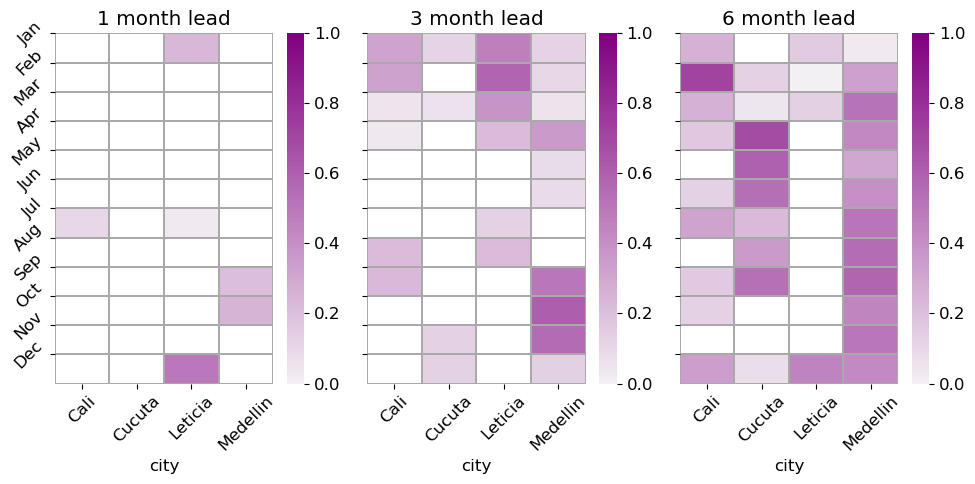

Made Skillful
Lead
1 month    12.500000
3 month    54.166667
6 month    70.833333
Name: Made Skillful, dtype: float64
Average R2
variable     value  Made Skillful
Lead                             
1 month   0.220343            1.0
3 month   0.239688            1.0
6 month   0.336158            1.0


In [49]:
import seaborn as sns


for nb in [True,False]:
    i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_1mo.csv')
    i1n=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_1mo_nb.csv')
    i1n['variable'] = "Climate Model + AR"
    i1n=pd.concat([i1n,i1[i1.variable=="AR"]])

    i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_3mo.csv')
    i3n=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_3mo_nb.csv')
    i3n['variable'] = "Climate Model + AR"
    i3n=pd.concat([i3n,i3[i3.variable=="AR"]])

    i6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_6mo.csv')
    i6n=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_3mo_nb.csv')
    i6n['variable'] = "Climate Model + AR"
    i6n=pd.concat([i6n,i6[i6.variable=="AR"]])
    
    if nb:
        i1=i1n
        i3=i3n
        i6=i6n

    i1['Lead'] = '1 month'
    i3['Lead'] = '3 month'
    i6['Lead'] = '6 month'


    iall=pd.concat([i1,i3,i6])
    #iall = iall[(iall.variable=='Climate Model + AR')]
    comparison=iall.pivot(index=["month","city","Lead"], columns="variable", values="value")
    comparison.AR[comparison.AR<0]=0
    comparison['value']=comparison['Climate Model + AR'] - comparison.AR
    iall = comparison.reset_index()
    iall['Made Skillful'] = (iall.AR < 0) & (iall['Climate Model + AR']>0)
    iall['Made Skillful'] = (iall.value > 0) & (iall['Climate Model + AR']>0)

    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,5),sharey=True,sharex='col') 

    #df_cmat.rename(columns={'location_x':'location'}, inplace=True)
    plt.rcParams.update({'font.size': 12})
    for j, X in enumerate(['1 month','3 month','6 month']):

        xtick_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        cityNames = ['Cali','Cucuta','Leticia','Medellin']

        #choose = [x for x in matrix.columns if name in x]
        heat=iall[(iall.Lead==X)].pivot(index="month", columns="city", values="value")
        ms = iall[(iall.Lead==X)].pivot(index="month", columns="city", values="Made Skillful")
        sns.heatmap(heat,mask=~ms,ax=ax[j],linewidths=0.01,cmap=sns.color_palette('light:purple',as_cmap=True),vmin=0,vmax=1,
                   linecolor='darkgray')
        ax[j].set_title(str(X)+' lead')
        ax[j].set_yticks(range(len(xtick_names)))
        ax[j].set_yticklabels(xtick_names,rotation=45)
        ax[j].set_xticklabels(cityNames,rotation=45)
        ax[j].set_ylabel('')
    
    fig.tight_layout()
    plt.show()
    
    print("Made Skillful")
    print((iall.groupby('Lead').sum()['Made Skillful']/48)*100)
    
    AvgR2 = iall[['Lead','value','Made Skillful']]
    print("Average R2")
    print(AvgR2[AvgR2['Made Skillful']==True].groupby("Lead").mean())




In [50]:
df = comparison.reset_index()

print(df[(df.Lead=="1 month") & (df.value>0)])


i1[(i1.city=="leticia")&(i1.month==12)]

#i1[(i1.city=="cali")&(i1.month==7)]





variable  month      city     Lead        AR  Climate Model + AR     value
6             1   leticia  1 month  0.360997            0.597523  0.236526
72            7      cali  1 month  0.682886            0.784632  0.101746
78            7   leticia  1 month  0.505350            0.535796  0.030446
105           9  medellin  1 month  0.656555            0.865892  0.209337
117          10  medellin  1 month  0.420137            0.666828  0.246691
138          12   leticia  1 month  0.053162            0.550472  0.497310


variable,month,city,Lead,AR,Climate Model + AR,value,Made Skillful
0,1,cali,1 month,0.510927,0.475616,-0.035310,False
1,1,cali,3 month,0.000000,0.320757,0.320757,True
2,1,cali,6 month,0.000000,0.258335,0.258335,True
3,1,cucuta,1 month,0.777173,0.692087,-0.085086,False
4,1,cucuta,3 month,0.194803,0.312020,0.117218,True
...,...,...,...,...,...,...,...
139,12,leticia,3 month,0.598071,0.388653,-0.209418,False
140,12,leticia,6 month,0.000000,0.456898,0.456898,True
141,12,medellin,1 month,0.709418,0.430303,-0.279114,False
142,12,medellin,3 month,0.000000,0.135643,0.135643,True


Find ARs worse than Climatology at 3- and 6- months, and how much Climate Model Improves

In [29]:
BadAR = comparison.reset_index()

BadAR=BadAR[((BadAR.Lead=="3 month") | (BadAR.Lead=="6 month"))&  (BadAR.AR<=0)]

print("Number of Models with AR R^2 <= 0:",len(BadAR))


BAR3=BadAR[(BadAR.Lead=="3 month")]['Climate Model + AR']
BAR6=BadAR[(BadAR.Lead=="6 month")]['Climate Model + AR']

print(np.min(BAR3),np.mean(BAR3),np.max(BAR3))
print(np.min(BAR3),np.median(BAR3),np.max(BAR3))

print(np.min(BAR6),np.mean(BAR6),np.max(BAR6))
print(np.min(BAR6),np.median(BAR6),np.max(BAR6))


BAR6



NameError: name 'comparison' is not defined

All

In [39]:
iall[(iall['Made Skillful']==True) & 
         (iall['Lead']=='6 month')& (iall['AR']>-1)].sort_values(by=['city','value'],ascending=False).value.mean()

iall[(iall['city']=='cucuta') & (iall['Lead']=='6 month') & (iall['Made Skillful']==True)].value.max()

(len(iall[(iall['Lead']=='1 month') & (iall['Made Skillful']==True)])/48)*100

iall[(iall['Lead']=='6 month') & (iall['Made Skillful']==True)].value.mean()

0.3361576936620807

In [27]:
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_1mo.csv')
i2=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_3mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_6mo.csv')
i1['Lead'] = '1 month'
i2['Lead'] = '3 month'
i3['Lead'] = '6 month'
imp=pd.concat([i1,i2,i3])
imp.rename(columns={"value": "Importance"},inplace=True)

imp2=pd.merge(imp,iall,on=['city','month','Lead'])

imp[imp.pred.str.contains('Temp')].groupby(['Lead','pred'])['Importance'].mean()*100

imp2[imp2['Made Skillful']==True].groupby(['Lead','pred']).count()

imp2[(imp2['Made Skillful']==True) & (imp2['Lead']=='6 month')].sort_values(by=['value','Importance'],ascending=False).style

KeyError: 'Made Skillful'

0     12
1     10
2      2
3      8
4     10
5      9
6      5
7      8
8      4
9     11
10     6
11     9
12    12
13     7
14    11
15     6
16     5
17     8
18     1
19    12
20     3
21     7
22     6
23     7
24     7
25     3
26     3
27     7
28     3
29    12
30     9
31     1
32     6
33     9
34    11
35     1
36     7
37     4
38    12
39     5
40    10
Name: value, dtype: int64


/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/796235650.py:55: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  rankplot=sns.catplot(x='pred',y='PctInc',hue='city',data=meanInc,col='Lead',kind='bar',palette=sns.color_palette("Set2"))


,month,Lead,pred,city,PctInc
30,10,1 month,Global Scale,Cali,83.333333
28,9,3 month,Global Scale,Cali,75.000000
31,10,3 month,Autoregressive,Cali,83.333333
3,2,1 month,Hydrology,Cali,16.666667
24,8,3 month,Temperature,Cali,66.666667
23,8,1 month,Temperature,Cali,66.666667
8,4,6 month,Autoregressive,Cali,33.333333
10,5,3 month,Hydrology,Cali,41.666667
16,6,6 month,Hydrology,Cali,50.000000
36,12,1 month,Autoregressive,Cali,100.000000


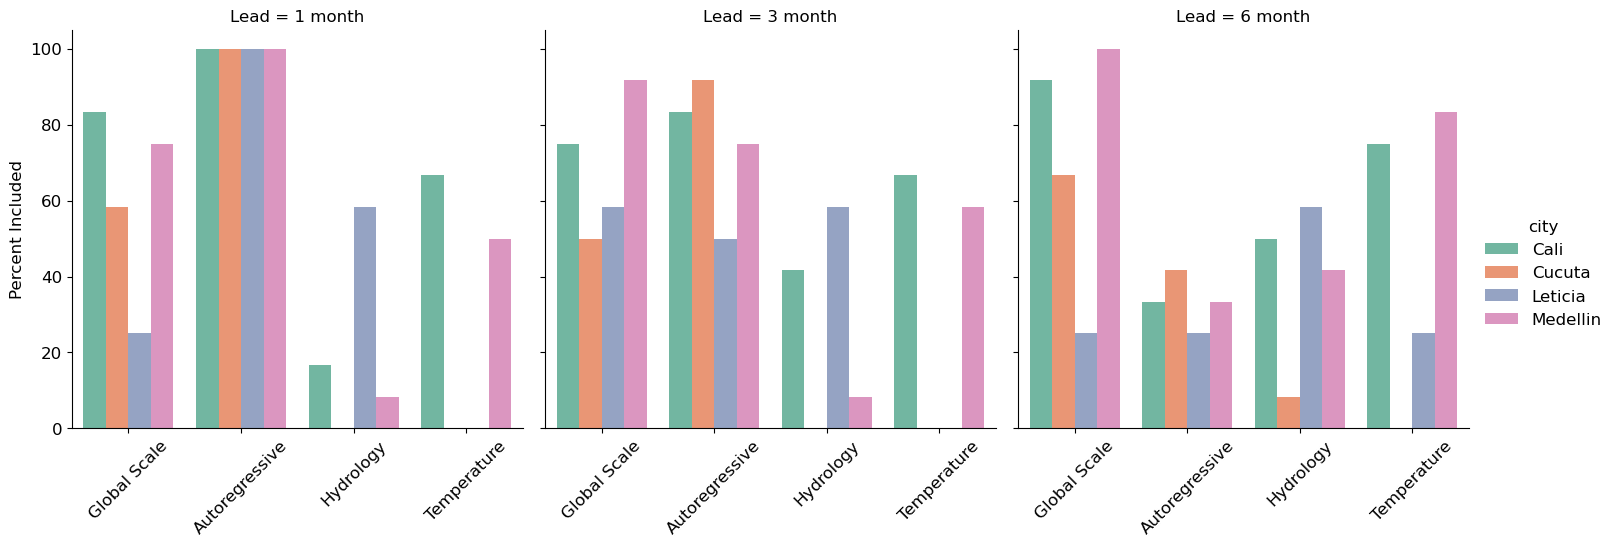

In [41]:
import numpy as np
import seaborn as sns
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_1mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_3mo.csv')
i6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_6mo.csv')
i1['Lead'] = '1 month'
i3['Lead'] = '3 month'
i6['Lead'] = '6 month'

iall=pd.concat([i1,i3,i6])

test=iall[iall.value>0].groupby(['city','Lead','pred']).count().reset_index()

test['PctInc']=(test.value/48)*100

test.sort_values(['city','Lead','PctInc'],ascending=False)


'''#By individual predictor
test=iall[iall.value>0].groupby(['Lead','pred']).count().reset_index()
test['PctInc']=(test.value/48)*100
meanInc=test.groupby(['month','Lead','pred','city']).PctInc.mean().reset_index()
rankplot=sns.catplot(x='pred',y='PctInc',hue='city',data=meanInc,col='Lead',kind='bar',palette=sns.color_palette("Set2"))
for i, ax in enumerate(rankplot.axes.flatten()):
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('Percent Inclusion', fontsize=10)
    if i == 1:
        ax.set_ylabel('', fontsize=10)'''



#By predictor type
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_1mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_3mo.csv')
i6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_6mo.csv')
i1['Lead'] = '1 month'
i3['Lead'] = '3 month'
i6['Lead'] = '6 month'

iall=pd.concat([i1,i3,i6])

test=iall[iall.value>0].groupby(['city','Lead','pred']).count().reset_index()

test['PctInc']=(test.value/48)*100

#test.sort_values(['city','Lead','PctInc'],ascending=False)

        
test=iall[iall.value>0].groupby(['city','Lead','pred']).count().reset_index()
print(test.value)
test['PctInc']=(test.value/12)*100
meanInc=test.groupby(['month','Lead','pred','city']).PctInc.mean().reset_index()
meanInc['city']=meanInc.city.str.capitalize()
meanInc=meanInc.sort_values(by="city")
rankplot=sns.catplot(x='pred',y='PctInc',hue='city',data=meanInc,col='Lead',kind='bar',palette=sns.color_palette("Set2"))
for i, ax in enumerate(rankplot.axes.flatten()):
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('Percent Included', fontsize=12)
    if i == 1:
        ax.set_ylabel('', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

meanInc

In [20]:
meanInc[meanInc.pred=="Hydrology"]

data = {
    'GPH200PC1', 'GPH200PC2', 'Max. Rel. Humidity (%)_lag1', 'Max. Rel. Humidity (%)_lag3',
    'Max. Rel. Humidity (%)_lag6', 'Max. Temperature (C)_lag1', 'Max. Temperature (C)_lag3',
    'Max. Temperature (C)_lag6', 'Mean Temeprature (C)_lag1', 'Mean Temeprature (C)_lag3',
    'Mean Temeprature (C)_lag6', 'Mean. Rel. Humidity (%)_lag1', 'Mean. Rel. Humidity (%)_lag3',
    'Mean. Rel. Humidity (%)_lag6', 'Min. Rel. Humidity (%)_lag1', 'Min. Rel. Humidity (%)_lag3',
    'Min. Rel. Humidity (%)_lag6', 'Min. Temperature (C)_lag1', 'Min. Temperature (C)_lag3',
    'Min. Temperature (C)_lag6', 'Nino 1+2', 'Nino 1+2_lag1', 'Nino 1+2_lag3', 'Nino 1+2_lag6',
    'Nino 1+2_lag_1', 'Nino 1+2_lag_3', 'Nino 1+2_lag_6', 'Nino 3', 'Nino 3.4', 'Nino 3.4_lag1',
    'Nino 3.4_lag3', 'Nino 3.4_lag6', 'Nino 3.4_lag_1', 'Nino 3.4_lag_3', 'Nino 3.4_lag_6',
    'Nino 3_lag1', 'Nino 3_lag3', 'Nino 3_lag6', 'Nino 3_lag_1', 'Nino 3_lag_3', 'Nino 3_lag_6',
    'Nino 4', 'Nino 4_lag1', 'Nino 4_lag3', 'Nino 4_lag6', 'Nino 4_lag_1', 'Nino 4_lag_3',
    'Nino 4_lag_6', 'Precipitation (mm)_lag1', 'Precipitation (mm)_lag3', 'Precipitation (mm)_lag6',
    'SPI_lag1', 'SPI_lag3', 'SPI_lag6', 'SST_lag1_IPC1', 'SST_lag1_IPC2', 'SST_lag3_IPC1',
    'SST_lag3_IPC2', 'SST_lag6_IPC1', 'SST_lag6_IPC2', 'TMAX', 'TMIN', 'lag_1', 'lag_3', 'lag_6'
}


# Keywords to filter by
keywords = ["Humidity", "Precipitation", "Streamflow","SPI"]

# Filter the data
filtered_data = {item for item in data if any(keyword in item for keyword in keywords)}

# Display the filtered data
filtered_data


def filter_dataframe(df, column_name, value_dict):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    filtered_df = df[df[column_name].isin(value_dict)]
    return filtered_df

filtered_df = filter_dataframe(imp, 'pred', filtered_data)

filtered_df[["city","Lead","Importance","pred"]].groupby(["city","Lead","pred"]).mean()

filtered_df.style

,Unnamed: 0,month,city,pred,Importance,Lead


In [21]:
#sns.barplot(x="city",y="Importance",hue="Lead",data=imp2[imp2.pred=="Max. Rel. Humidity (%)_lag6"])

summ=imp[['Importance','pred',"Lead"]].groupby(["Lead","pred"]).mean().reset_index()

summ

#sns.catplot(x='pred',y='Importance',col="Lead",data=summ)


summ[summ.Lead=="6 month"].sort_values(by="Importance",ascending=False)

pr = imp[imp['pred'].str.contains('Precip')]


pr[pr.Importance>0]

,Unnamed: 0,month,city,pred,Importance,Lead


Type

In [48]:
iall

,Unnamed: 0,month,city,pred,value,Lead
0,0,1.0,cali,Autoregressive,0.088252,1 month
1,1,2.0,cali,Autoregressive,0.271738,1 month
2,2,3.0,cali,Autoregressive,0.575559,1 month
3,3,4.0,cali,Autoregressive,0.558193,1 month
4,4,5.0,cali,Autoregressive,0.435650,1 month
...,...,...,...,...,...,...
163,163,7.0,leticia,Temperature,0.000000,6 month
164,164,9.0,leticia,Temperature,0.000000,6 month
165,165,10.0,leticia,Temperature,0.000000,6 month
166,166,11.0,leticia,Temperature,0.000000,6 month


,Unnamed: 0,month,city,pred,Importance,Lead,AR,Climate Model + AR,value,Made Skillful
192,0,1.0,cali,Autoregressive,0.000000,3 month,0.000000,0.320757,0.320757,True
193,1,2.0,cali,Autoregressive,0.000000,3 month,0.000000,0.325723,0.325723,True
194,2,3.0,cali,Autoregressive,0.067535,3 month,0.284169,0.331600,0.047430,True
195,3,4.0,cali,Autoregressive,0.312979,3 month,0.546486,0.578969,0.032483,True
199,7,8.0,cali,Autoregressive,0.599709,3 month,0.000000,0.217298,0.217298,True
200,8,9.0,cali,Autoregressive,1.000000,3 month,0.000000,0.228608,0.228608,True
204,12,1.0,medellin,Autoregressive,0.000000,3 month,0.018482,0.143417,0.124935,True
205,13,2.0,medellin,Autoregressive,0.000000,3 month,0.090753,0.195381,0.104628,True
206,14,3.0,medellin,Autoregressive,0.049479,3 month,0.299013,0.353784,0.054771,True
207,15,4.0,medellin,Autoregressive,0.078783,3 month,0.209472,0.566788,0.357316,True


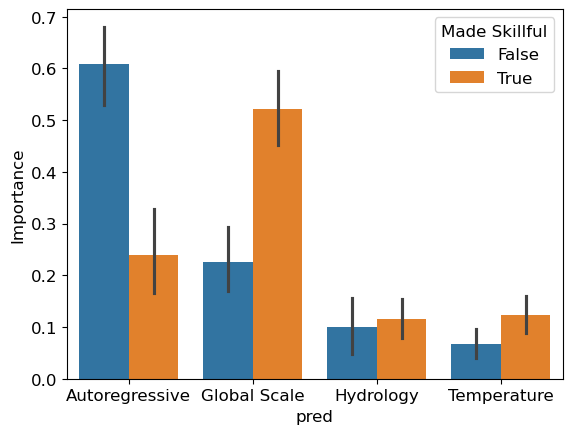

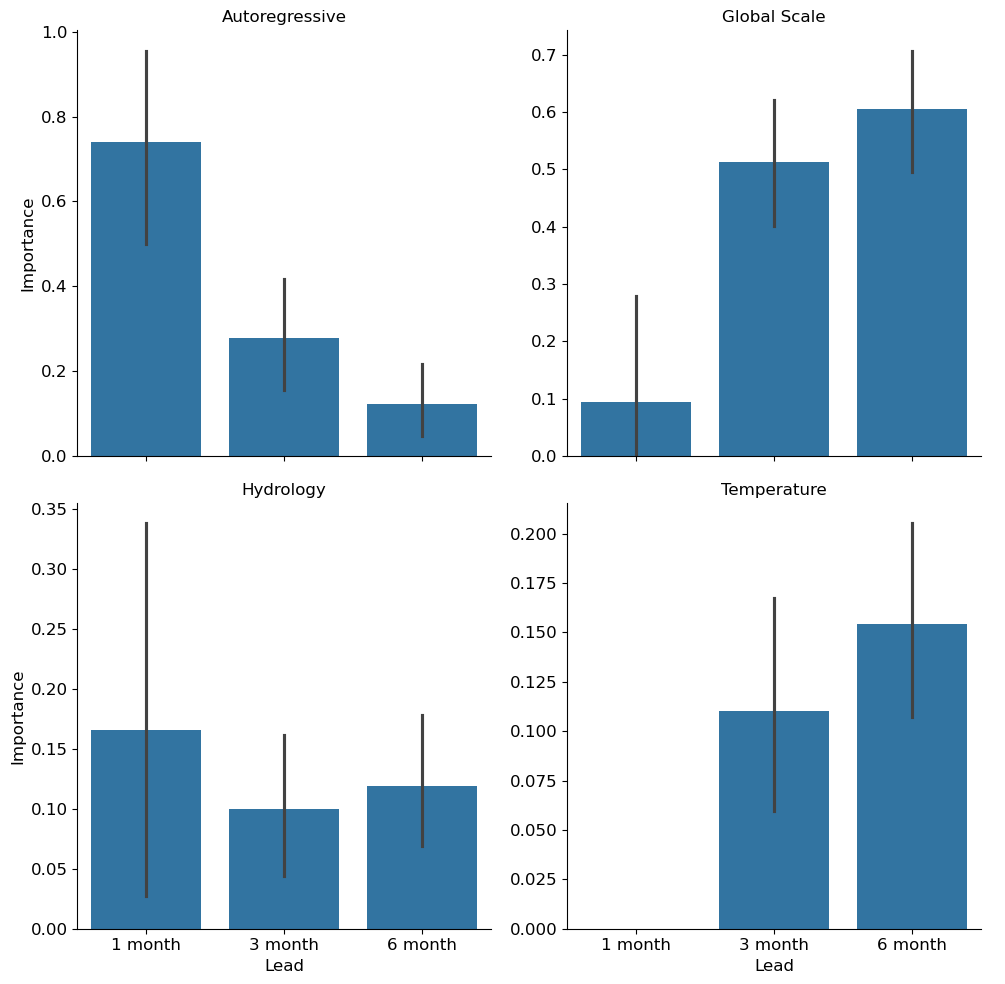

In [51]:
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_1mo.csv')
i2=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_3mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_6mo.csv')
i1['Lead'] = '1 month'
i2['Lead'] = '3 month'
i3['Lead'] = '6 month'
imp=pd.concat([i1,i2,i3])
imp.rename(columns={"value": "Importance"},inplace=True)

imp_r2=pd.merge(imp,iall,on=['city','month','Lead'])
sns.barplot(x='pred',y='Importance',hue='Made Skillful',data=imp_r2)



g=sns.catplot(x='Lead',y='Importance',col='pred',data=imp_r2[imp_r2['Made Skillful']==True],kind='bar',col_wrap=2,sharey=False)
g.set_titles("{col_name}")

impT_r2 = imp_r2


imp_r2[(imp_r2['Made Skillful']==True) & (imp_r2['Lead']=='3 month')& (imp_r2['pred']=='Autoregressive')]


Source

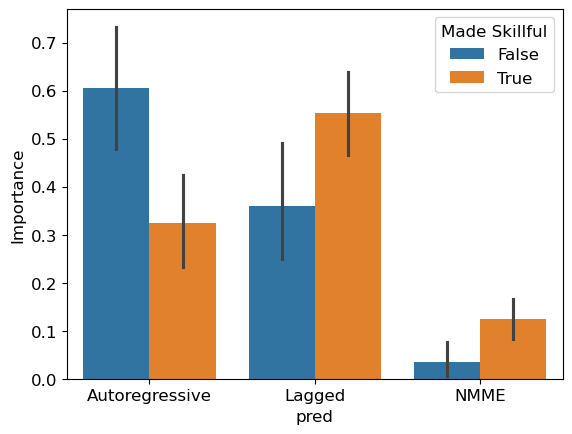

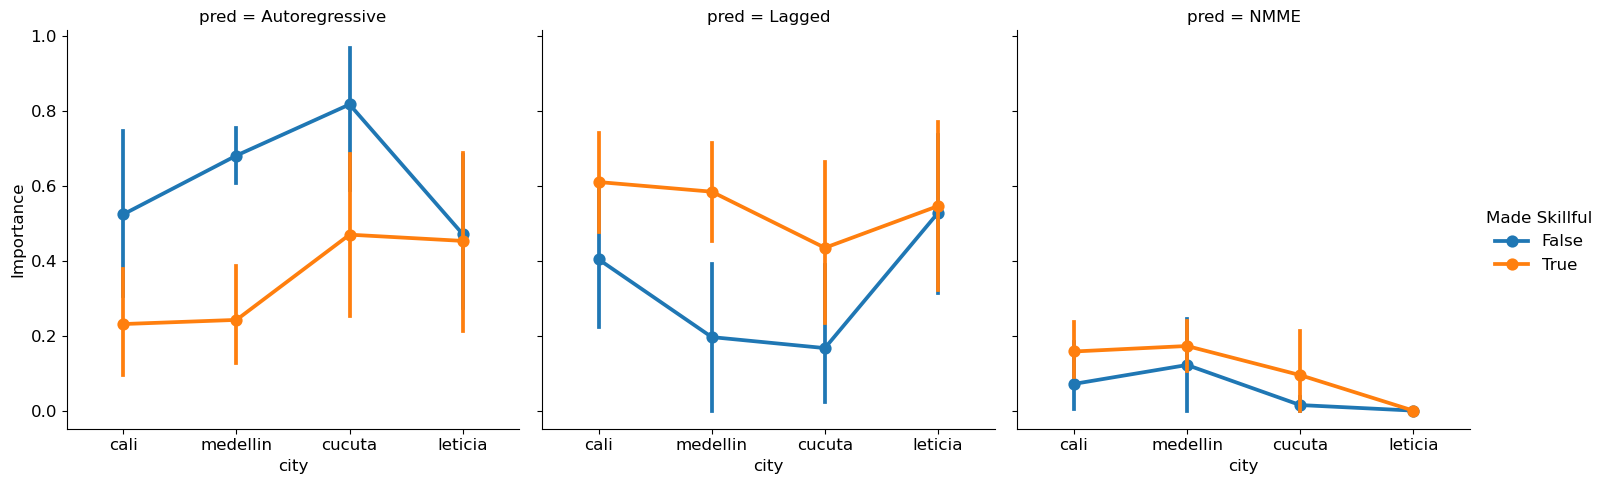

In [53]:
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceSource_1mo.csv')
i2=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceSource_3mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceSource_6mo.csv')
i1['Lead'] = '1 month'
i1['Lead'] = '3 month'
i3['Lead'] = '6 month'
imp=pd.concat([i1,i2,i3])
imp.rename(columns={"value": "Importance"},inplace=True)

imp_r2=pd.merge(imp,iall,on=['city','month','Lead'])
sns.barplot(x='pred',y='Importance',hue='Made Skillful',data=imp_r2)
plt.show()


sns.catplot(x='city',y='Importance',hue='Made Skillful',col='pred',data=imp_r2,kind='point')

impS_r2=imp_r2

/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/1095952113.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.catplot(x='month',y='Importance',hue='Made Skillful',col='pred',data=iplot,kind='point',col_wrap=3,ci=None)


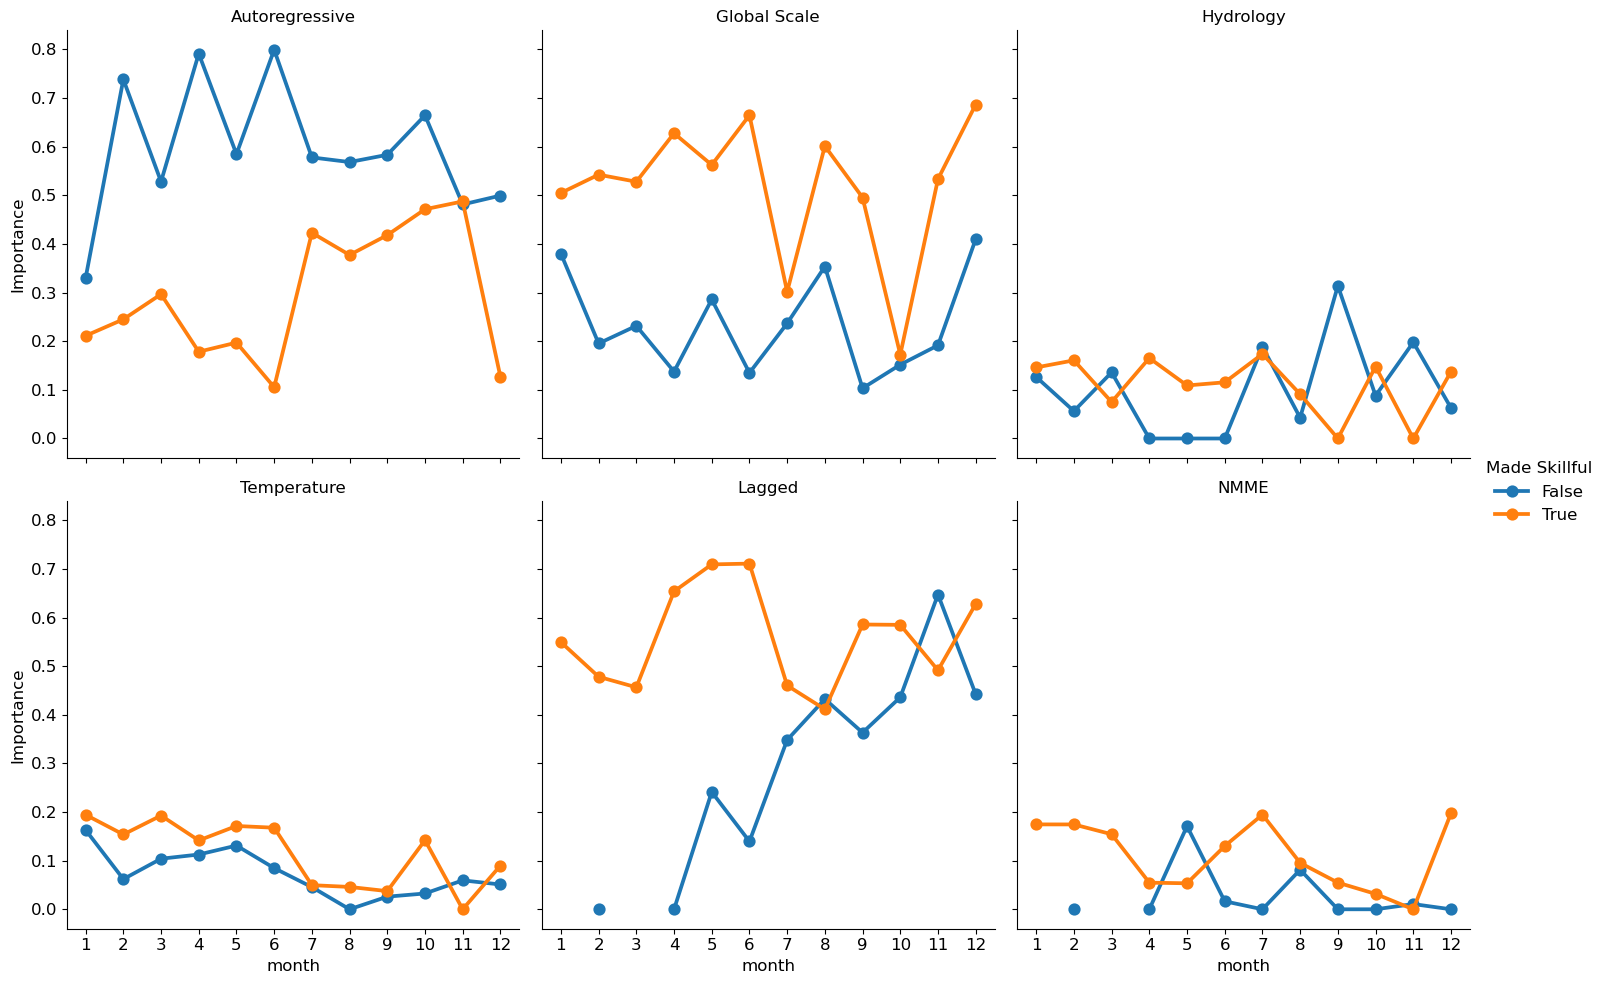

Text(0.5, 0, '')

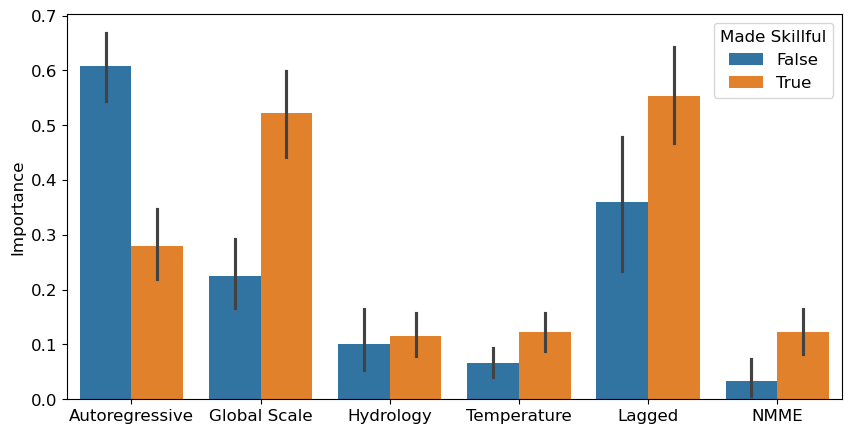

In [55]:
i1 = impT_r2[['month','city','Lead','pred','Importance','Made Skillful']]
i2 = impS_r2[['month','city','Lead','pred','Importance','Made Skillful']]

iplot = pd.concat([i1,i2])

iplot.month = iplot.month.astype(int)
g=sns.catplot(x='month',y='Importance',hue='Made Skillful',col='pred',data=iplot,kind='point',col_wrap=3,ci=None)
g.set_titles("{col_name}")
plt.show()

fig, ax = plt.subplots(figsize=(10,5),sharey=True,sharex='col')
g=sns.barplot(x='pred',y='Importance',hue='Made Skillful',data=iplot)
g.set_xlabel('')


/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/69933149.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g=sns.barplot(x='pred',y='Importance',hue='Incidence Rank',palette=sns.color_palette('light:purple'),data=iplot2)


Text(0.5, 0, '')

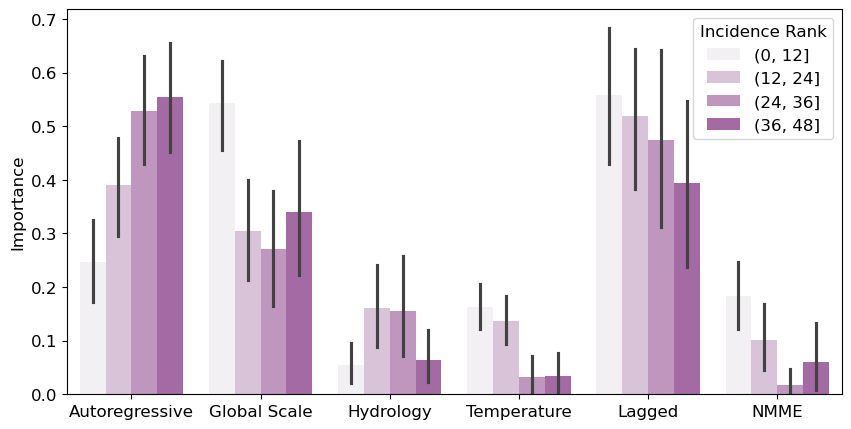

In [80]:
allec['IncidenceRank']=allec.upper.rank()
iplot2=pd.merge(iplot,allec)

bins = [0,12,24,36,48]
iplot2['Incidence Rank'] = pd.cut(iplot2['IncidenceRank'], bins)
#iplot2_sub=iplot2[iplot2['Made Skillful']==True]
#sns.catplot(x='binned',y='Importance',hue='Made Skillful',col='pred',kind='bar',data=iplot2,col_wrap=3)
fig, ax = plt.subplots(figsize=(10,5),sharey=True,sharex='col')
g=sns.barplot(x='pred',y='Importance',hue='Incidence Rank',palette=sns.color_palette('light:purple'),data=iplot2)
g.set_xlabel('')

In [67]:
iplot2

,month,city,Lead,pred,Importance,Made Skillful,central,upper,lower,IncidenceRank,Incidence Rank
0,1,cali,1 month,Autoregressive,0.088252,False,2.922045,4.574364,1.866566,18.0,"(0, 24]"
1,2,cali,1 month,Autoregressive,0.271738,False,2.786624,3.901657,1.990250,15.0,"(0, 24]"
2,3,cali,1 month,Autoregressive,0.575559,False,2.655868,3.609886,1.953977,11.0,"(0, 24]"
3,4,cali,1 month,Autoregressive,0.558193,False,2.636534,3.654307,1.902225,14.0,"(0, 24]"
4,5,cali,1 month,Autoregressive,0.435650,False,2.846495,3.910237,2.072134,16.0,"(0, 24]"
...,...,...,...,...,...,...,...,...,...,...,...
813,7,leticia,6 month,NMME,0.000000,False,4.013970,6.713571,2.399909,29.0,"(24, 48]"
814,9,leticia,6 month,NMME,0.000000,False,2.847087,4.897658,1.655057,21.0,"(0, 24]"
815,10,leticia,6 month,NMME,0.000000,False,3.313047,5.433839,2.019986,26.0,"(24, 48]"
816,11,leticia,6 month,NMME,0.000000,False,3.971116,7.438010,2.120159,33.0,"(24, 48]"


In [68]:
iplot2

,month,city,Lead,pred,Importance,Made Skillful,central,upper,lower,IncidenceRank,Incidence Rank
0,1,cali,1 month,Autoregressive,0.088252,False,2.922045,4.574364,1.866566,18.0,"(0, 24]"
1,2,cali,1 month,Autoregressive,0.271738,False,2.786624,3.901657,1.990250,15.0,"(0, 24]"
2,3,cali,1 month,Autoregressive,0.575559,False,2.655868,3.609886,1.953977,11.0,"(0, 24]"
3,4,cali,1 month,Autoregressive,0.558193,False,2.636534,3.654307,1.902225,14.0,"(0, 24]"
4,5,cali,1 month,Autoregressive,0.435650,False,2.846495,3.910237,2.072134,16.0,"(0, 24]"
...,...,...,...,...,...,...,...,...,...,...,...
813,7,leticia,6 month,NMME,0.000000,False,4.013970,6.713571,2.399909,29.0,"(24, 48]"
814,9,leticia,6 month,NMME,0.000000,False,2.847087,4.897658,1.655057,21.0,"(0, 24]"
815,10,leticia,6 month,NMME,0.000000,False,3.313047,5.433839,2.019986,26.0,"(24, 48]"
816,11,leticia,6 month,NMME,0.000000,False,3.971116,7.438010,2.120159,33.0,"(24, 48]"


/var/folders/l_/v7v4dc6d4qj247ft46m3f6fc0000gn/T/ipykernel_93129/1520933666.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g=sns.catplot(x='pred',y='Importance',hue='Incidence Rank',col="Lead",palette=sns.color_palette('light:purple'),data=iplot2,kind="bar",col_wrap=1,height=5,aspect=2,errorbar="ci")


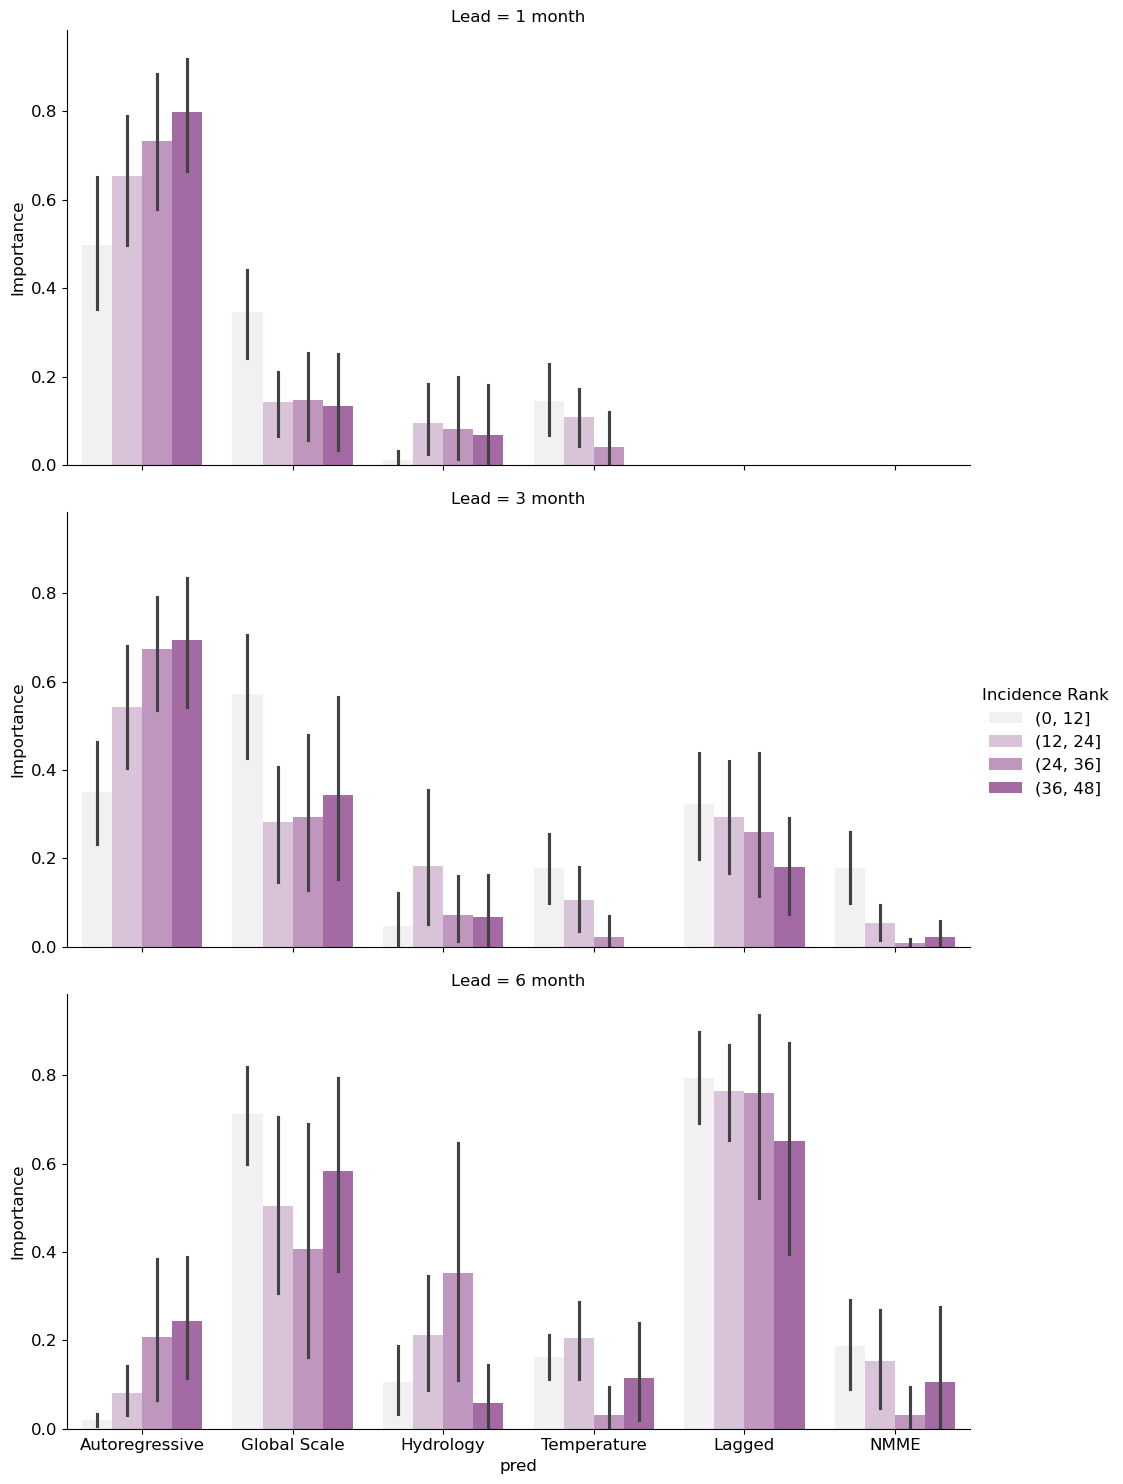

In [83]:
allec['IncidenceRank']=allec.upper.rank()
iplot2=pd.merge(iplot,allec)

bins = [0,12,24,36,48]
iplot2['Incidence Rank'] = pd.cut(iplot2['IncidenceRank'], bins)
#iplot2_sub=iplot2[iplot2['Made Skillful']==True]
#sns.catplot(x='binned',y='Importance',hue='Made Skillful',col='pred',kind='bar',data=iplot2,col_wrap=3)
g=sns.catplot(x='pred',y='Importance',hue='Incidence Rank',col="Lead",palette=sns.color_palette('light:purple'),data=iplot2,kind="bar",col_wrap=1,height=5,aspect=2,errorbar="ci")


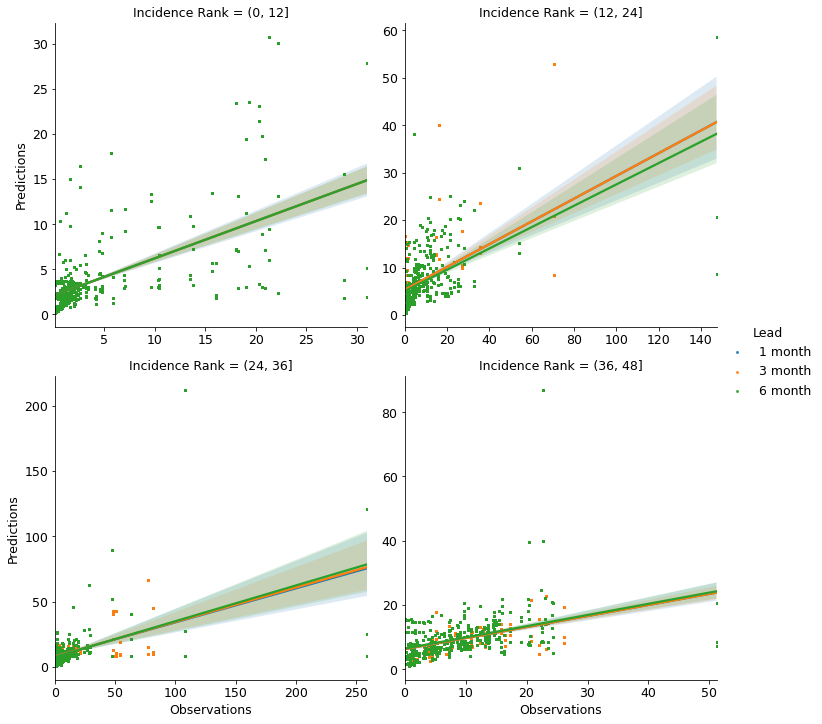

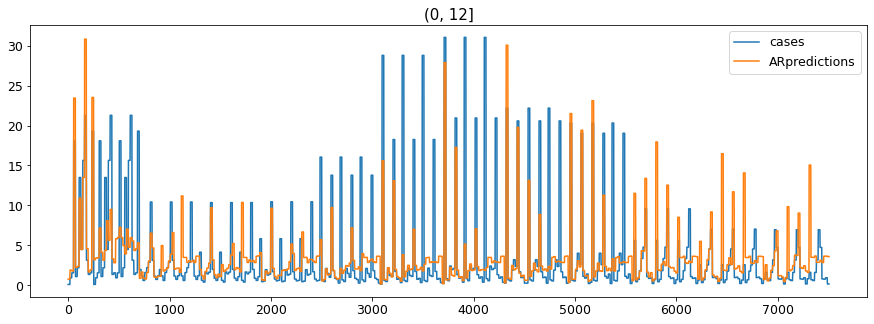

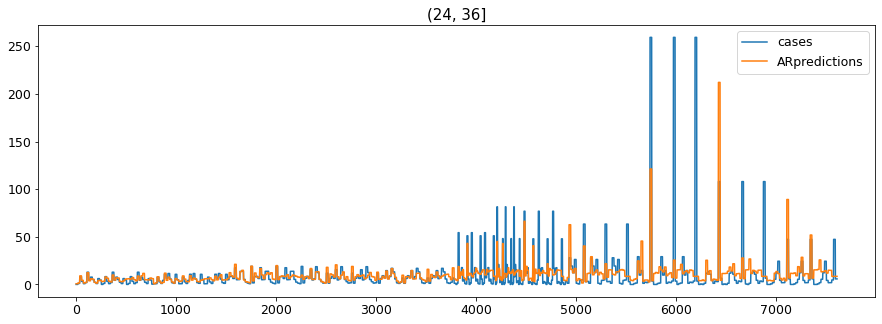

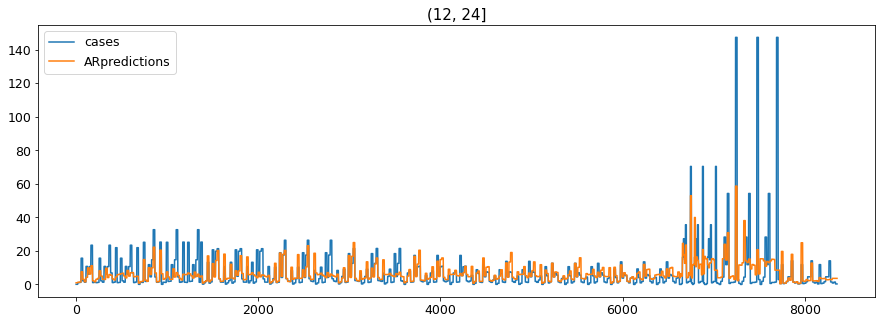

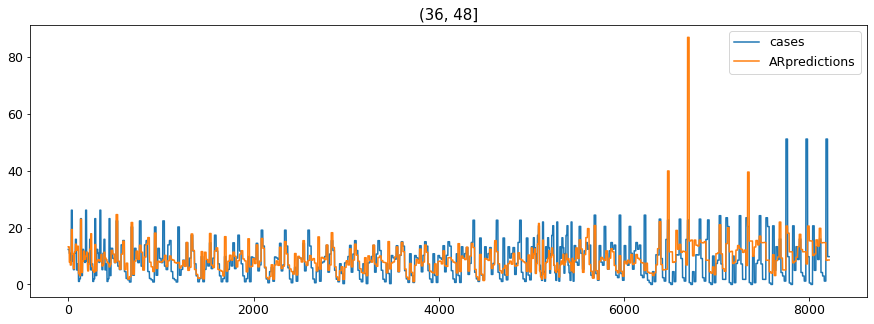

In [80]:
AR
iplot2
#AR = AR.rename(columns={'category':'Lead'})
#AR['Lead'] = AR.Lead.str.slice(0,7)
ARc = pd.merge(AR,iplot2[['Lead','month','city','Incidence Rank']])

g=sns.lmplot(data=ARc, x="cases", y="ARpredictions",hue='Lead',col='Incidence Rank',sharex=False,sharey=False,col_wrap=2
          ,scatter_kws={"s": 4})
g.set_ylabels("Predictions")
g.set_xlabels("Observations")
plt.show()

test=ARc

for i in set(test['Incidence Rank']):
    plt.subplots(figsize=(15,5))
    test[test['Incidence Rank'] == i].reset_index().cases.plot()
    test[test['Incidence Rank'] == i].reset_index().ARpredictions.plot()
    plt.legend()
    plt.title(i)
    plt.show()

,month,city,Lead,pred,Importance,Made Skillful,central,upper,lower,IncidenceRank,Incidence Rank
0,1,cali,1 month,Autoregressive,0.088252,False,2.922045,4.574364,1.866566,18.0,"(12, 24]"
1,1,cali,1 month,Global Scale,0.305408,False,2.922045,4.574364,1.866566,18.0,"(12, 24]"
2,1,cali,1 month,Hydrology,0.379473,False,2.922045,4.574364,1.866566,18.0,"(12, 24]"
3,1,cali,1 month,Temperature,0.226866,False,2.922045,4.574364,1.866566,18.0,"(12, 24]"
4,1,cali,3 month,Autoregressive,0.000000,True,2.922045,4.574364,1.866566,18.0,"(12, 24]"
...,...,...,...,...,...,...,...,...,...,...,...
813,12,leticia,3 month,Lagged,0.724969,False,3.959272,7.173543,2.185229,32.0,"(24, 36]"
814,12,leticia,3 month,NMME,0.000000,False,3.959272,7.173543,2.185229,32.0,"(24, 36]"
815,12,leticia,6 month,Autoregressive,0.000000,True,3.959272,7.173543,2.185229,32.0,"(24, 36]"
816,12,leticia,6 month,Lagged,1.000000,True,3.959272,7.173543,2.185229,32.0,"(24, 36]"


Made Skillful
False    26.0
True     18.0
Name: IncidenceRank, dtype: float64

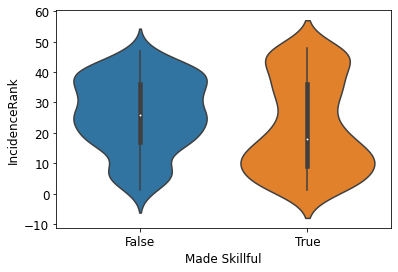

In [52]:
sns.violinplot(x="Made Skillful",y="IncidenceRank",data=iplot2)
iplot2.groupby("Made Skillful")["IncidenceRank"].median()

Incidence Rank
(0, 12]    -2.083333
(12, 24]   -1.727273
(24, 36]   -0.750000
(36, 48]    0.166667
Name: BSchange, dtype: float64

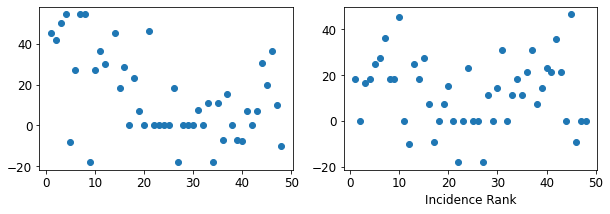

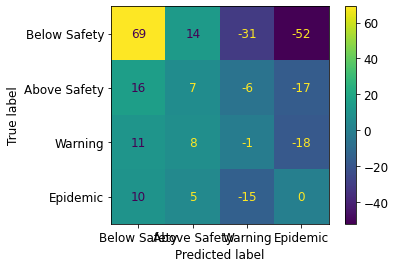

In [26]:
allec.sort_values(by='IncidenceRank',ascending=False)

rank_bs3=pd.merge(allec,BS3m)
rank_bs6=pd.merge(allec,BS6m)
rank_bs3.sort_values(by='IncidenceRank',ascending=False)

bins = [0,12,24,36,48]
rank_bs3['Incidence Rank'] = pd.cut(rank_bs3['IncidenceRank'], bins)
rank_bs6['Incidence Rank'] = pd.cut(rank_bs3['IncidenceRank'], bins)

#plt.scatter(rank_bs3.IncidenceRank,rank_bs3.DiagInc)


sub=np.subtract(cmat[96:],cmatAR[96:])
cmatStack=np.stack(sub)

acc=[]
for i in range(0,len(cmatStack)):
    acc.append(np.sum(cmatStack[i].diagonal()/np.sum(cmat[i]))*100)

d={'BSchange':cmatStack[:,3,3],'DiagPInc':acc,'city':cit[96:],'month':month[96:]}
BS6m=pd.DataFrame(d)

diag=[]
for i in range(0,len(cmatStack)):  
    diag.append(cmatStack[i].diagonal())
    
BS6m

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
ax[0].scatter(rank_bs3.IncidenceRank,rank_bs3.DiagPInc)
ax[1].scatter(rank_bs6.IncidenceRank,rank_bs6.DiagPInc)
plt.xlabel('Incidence Rank')


ConfusionMatrixDisplay(np.sum(cmat[96:],axis=0) - np.sum(cmatAR[96:],axis=0),display_labels=bin_labels).plot()

rank_bs6.groupby('Incidence Rank')['BSchange'].mean()

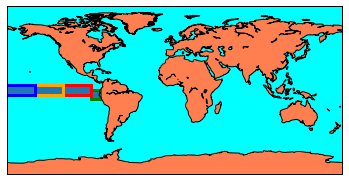

In [590]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

map = Basemap(projection='cyl')

region_1_2 = np.array([[-10, 0], [-90+360, -80+360]])
region_3 = np.array([[-5, 5], [-150+360, -90+360]])
region_3_4 = np.array([[-5, 5], [-170+360, -120+360]])
region_4 = np.array([[-5, 5], [-200+360, -150+360]])

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

x1,y1 = map(-90,-10)
x2,y2 = map(-90,0)
x3,y3 = map(-80,0)
x4,y4 = map(-80,-10)
poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],edgecolor='green',linewidth=1)
plt.gca().add_patch(poly)


x1,y1 = map(-150,-5)
x2,y2 = map(-150,5)
x3,y3 = map(-90,5)
x4,y4 = map(-90,-5)
poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],edgecolor='red',linewidth=1)
plt.gca().add_patch(poly)

x1,y1 = map(-170,-5)
x2,y2 = map(-170,5)
x3,y3 = map(-120,5)
x4,y4 = map(-120,-5)
poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],edgecolor='orange',linewidth=1)
plt.gca().add_patch(poly)


x1,y1 = map(-200,-5)
x2,y2 = map(-200,5)
x3,y3 = map(-150,5)
x4,y4 = map(-150,-5)
poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],edgecolor='blue',linewidth=1)
plt.gca().add_patch(poly)

plt.show()

